In [1]:
# Import the necessary libraries and load the files needed for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches


## Quality Star Rating Analysis

### Quality Star Rating Measures (7)
* How often the home health team began their patients care in a timely manner
* How often patients got better at walking or moving around
* How often patients got better at getting in and out of bed
* How often patients got better at bathing
* How often patients breathing improved
* How often patients got better at taking their drugs correctly by mouth
* How often home health patients had to be admitted to the hospital


In [2]:
df = pd.read_csv('Resources/HH_Provider_Jan2023.csv')


In [3]:
# Set the below parameters so that all rows and columns would be visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:
# Calculate the number of rows and columns in the dataset
df.shape


(11609, 64)

In [5]:
df.head().style.set_properties(**{'text-align': 'right'})


In [6]:
df.tail().style.set_properties(**{'text-align': 'right'})


### Remove cells that will not be related to further analysis


In [7]:
columns_to_drop = ['Footnote for quality of patient care star rating',
                  'Footnote for how often the home health team began their patients care in a timely manner',
                  'Footnote for how often the home health team taught patients (or their family caregivers) about their drugs',
                  'Footnote for how often the home health team determined whether patients received a flu shot for the current flu season',
                  'Footnote for how often patients got better at walking or moving around',
                  'Footnote for how often patients got better at getting in and out of bed',
                  'Footnote for how often patients got better at bathing',
                  'Footnote for how often patients breathing improved',
                  'Footnote for how often patients got better at taking their drugs correctly by mouth',
                  'Footnote for how often home health patients had to be admitted to the hospital',
                  'Footnote for how often patients receiving home health care needed urgent, unplanned care in the ER without being admitted',
                  'Footnote Changes in skin integrity post-acute care: pressure ulcer/injury',
                  'Footnote for how often physician-recommended actions to address medication issues were completely timely',
                  'Footnote for Percent of Residents Experiencing One or More Falls with Major Injury',
                  'Footnote for Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function',
                  'Footnote for DTC Risk-Standardized Rate',
                  'Footnote for PPR Risk-Standardized Rate',
                  'Footnote for how much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']

df.drop(columns = columns_to_drop, inplace = True)

In [8]:
df.shape


(11609, 46)

In [9]:
df.head().style.set_properties(**{'text-align': 'right'})


In [10]:
df.tail().style.set_properties(**{'text-align': 'right'})


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11609 entries, 0 to 11608
Data columns (total 46 columns):
 #   Column                                                                                                                                                    Non-Null Count  Dtype  
---  ------                                                                                                                                                    --------------  -----  
 0   State                                                                                                                                                     11609 non-null  object 
 1   CMS Certification Number (CCN)                                                                                                                            11609 non-null  int64  
 2   Provider Name                                                                                                                                             

In [12]:
df.describe().style.set_properties(**{'text-align': 'right'})


#### 11609 Medicare certified agencies
#### 7786 Medicare certified agencies with Quality Star Ratings


In [13]:
# Percentage of Medicare certified agencies with star ratings

percent_agencies_with_star_ratings = 7786/11609
print("Percentage of Medicare certified agencies with star ratings is {:.2f}%.".format(percent_agencies_with_star_ratings))


Percentage of Medicare certified agencies with star ratings is 0.67%.


In [14]:
df.dtypes


State                                                                                                                                                        object
CMS Certification Number (CCN)                                                                                                                                int64
Provider Name                                                                                                                                                object
Address                                                                                                                                                      object
City                                                                                                                                                         object
ZIP                                                                                                                                                           int64
Phone           

In [15]:
# Check if there are any missing values

df.isnull().sum()


State                                                                                                                                                          0
CMS Certification Number (CCN)                                                                                                                                 0
Provider Name                                                                                                                                                  0
Address                                                                                                                                                        0
City                                                                                                                                                           0
ZIP                                                                                                                                                            0
Phone                             

###  Create Star Rating DataFrame to look at the correlation of star rating measures to the overall star rating

In [16]:
# Create the star_rating_df DataFrame.
star_rating_df = df[['Quality of patient care star rating', 
                     'How often the home health team began their patients care in a timely manner',
                    'How often patients got better at walking or moving around',
                    'How often patients got better at getting in and out of bed',
                    'How often patients got better at bathing',
                    'How often patients breathing improved',
                    'How often patients got better at taking their drugs correctly by mouth',
                    'How often home health patients had to be admitted to the hospital']].copy()
star_rating_df.head().style.set_properties(**{'text-align': 'right'})

In [17]:
star_rating_corr = star_rating_df.corr()
star_rating_corr.style.set_properties(**{'text-align': 'right'})

Text(0.5, 1.0, 'Correlation of Star Rating Measures')

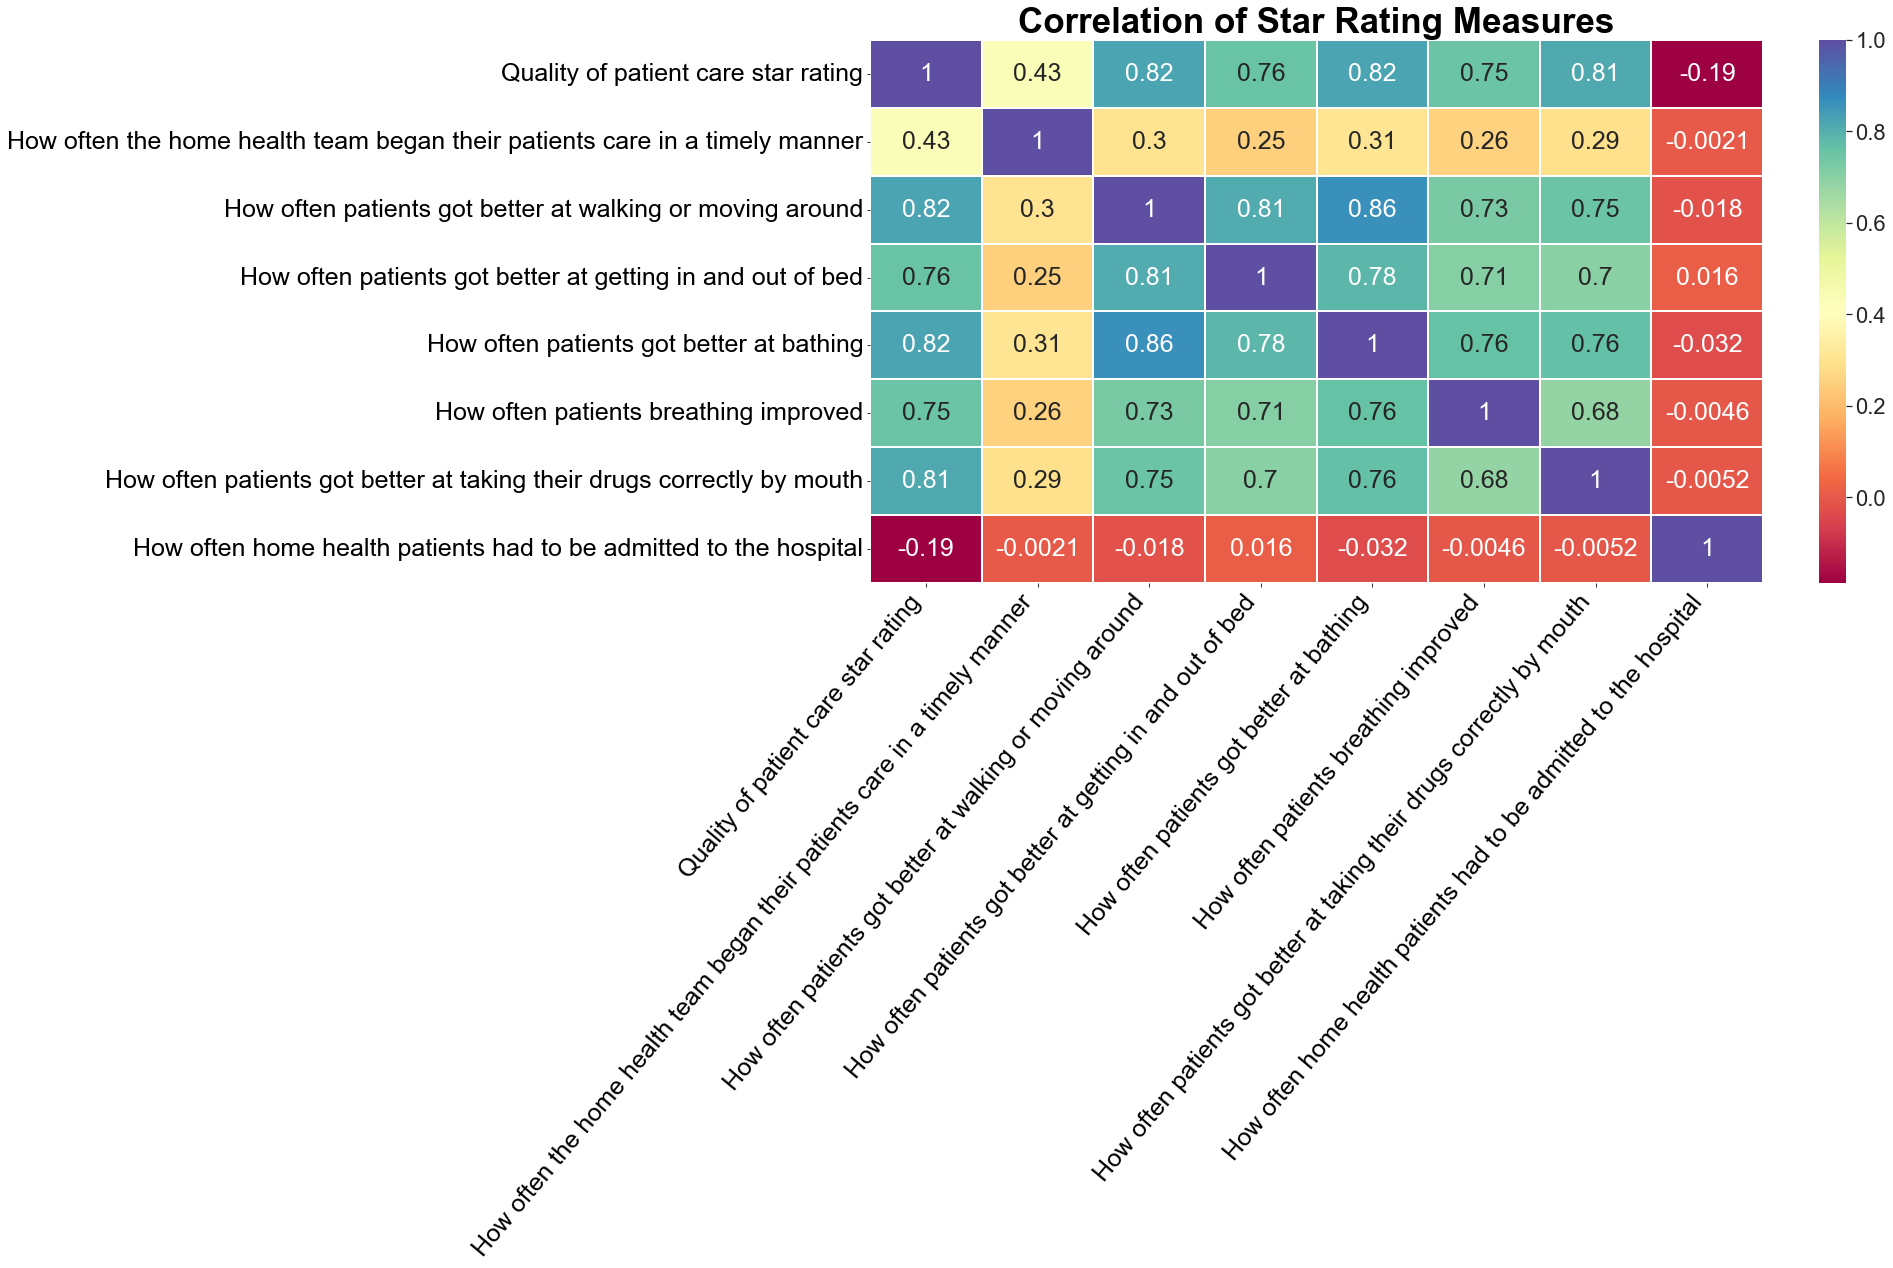

In [18]:
fig, ax = plt.subplots(figsize = (20, 10))

# Sample figsize in inches

sns.set(font_scale = 2.0)

g = sns.heatmap(star_rating_corr, xticklabels = star_rating_corr.columns, yticklabels = star_rating_corr.columns, 
            annot = True, linewidths = .2, ax = ax, cmap = 'Spectral', annot_kws={'size': 25})
g.set_xticklabels(g.get_xticklabels(), rotation = 50, fontsize = 25, ha = "right")
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 25, va = "center")
plt.title('Correlation of Star Rating Measures', fontsize = 35, fontweight = 'bold')

In [19]:
star_rating_df.describe().style.set_properties(**{'text-align': 'right'})


### Quality Star Rating Distribution


In [20]:
star_rating = pd.DataFrame(df['Quality of patient care star rating'].value_counts())
star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Quality Star Rating Distribution')

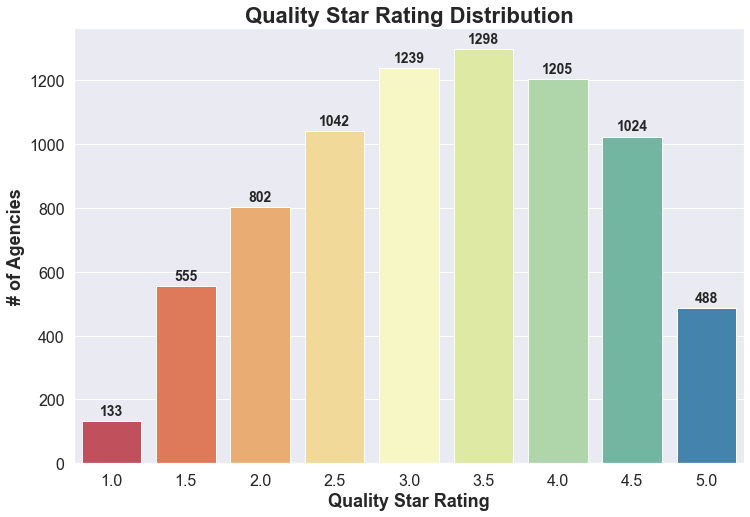

In [21]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [22]:
# Create star_rating_nat_df DataFrame.
star_rating_nat_df = df[['Quality of patient care star rating']].copy()
star_rating_nat_df.head()


Quality of patient care star rating
0                                  4.5
1                                  2.0
2                                  2.0
3                                  4.0
4                                  2.0

In [23]:
star_rating_nat_df.describe()


Quality of patient care star rating
count                          7786.000000
mean                              3.249743
std                               1.022742
min                               1.000000
25%                               2.500000
50%                               3.500000
75%                               4.000000
max                               5.000000

In [24]:
star_rating_nat_clean_df = star_rating_nat_df.dropna()
star_rating_nat_clean_df.describe()


Quality of patient care star rating
count                          7786.000000
mean                              3.249743
std                               1.022742
min                               1.000000
25%                               2.500000
50%                               3.500000
75%                               4.000000
max                               5.000000

Text(0.5, 1.0, 'National:  Quality Star Rating')

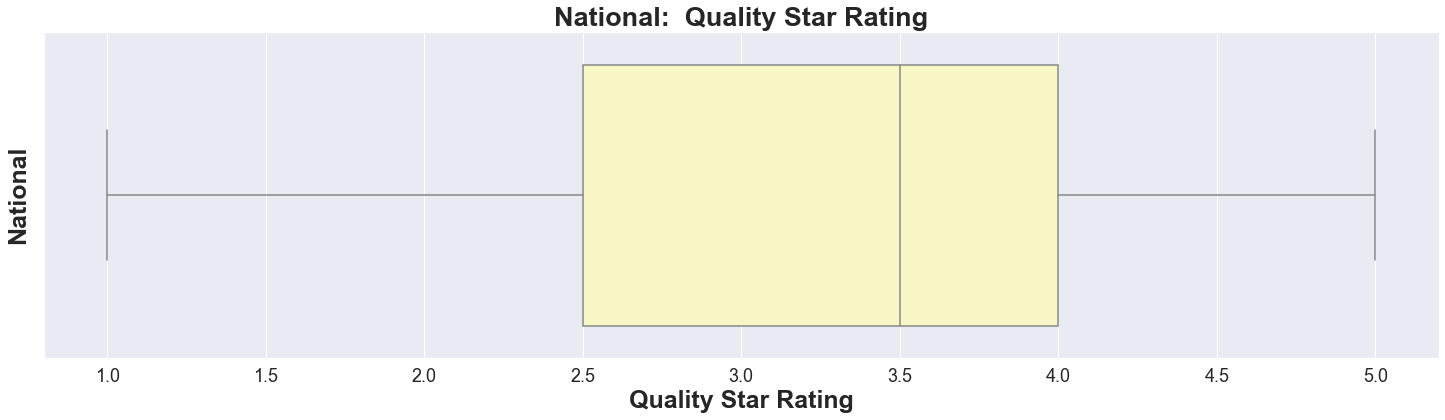

In [25]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=star_rating_nat_clean_df, x='Quality of patient care star rating', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Quality Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Quality Star Rating', size = 27, fontweight = 'bold')


In [26]:
# Create star_rating_state_df DataFrame.
star_rating_state_df = df[['State',
                    'Quality of patient care star rating']].copy()
star_rating_state_df.head()


State  Quality of patient care star rating
0    AK                                  4.5
1    AK                                  2.0
2    AK                                  2.0
3    AK                                  4.0
4    AK                                  2.0

In [27]:
star_rating_state_df.describe()


Quality of patient care star rating
count                          7786.000000
mean                              3.249743
std                               1.022742
min                               1.000000
25%                               2.500000
50%                               3.500000
75%                               4.000000
max                               5.000000

In [28]:
star_rating_state_clean_df = star_rating_state_df.dropna()
star_rating_state_clean_df.describe()

Quality of patient care star rating
count                          7786.000000
mean                              3.249743
std                               1.022742
min                               1.000000
25%                               2.500000
50%                               3.500000
75%                               4.000000
max                               5.000000

In [29]:
# Create a State summary by using .groupby

star_rating_state_clean_df.groupby(['State']).agg({'Quality of patient care star rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Quality of Patient Care Star Rating by State/Territory')

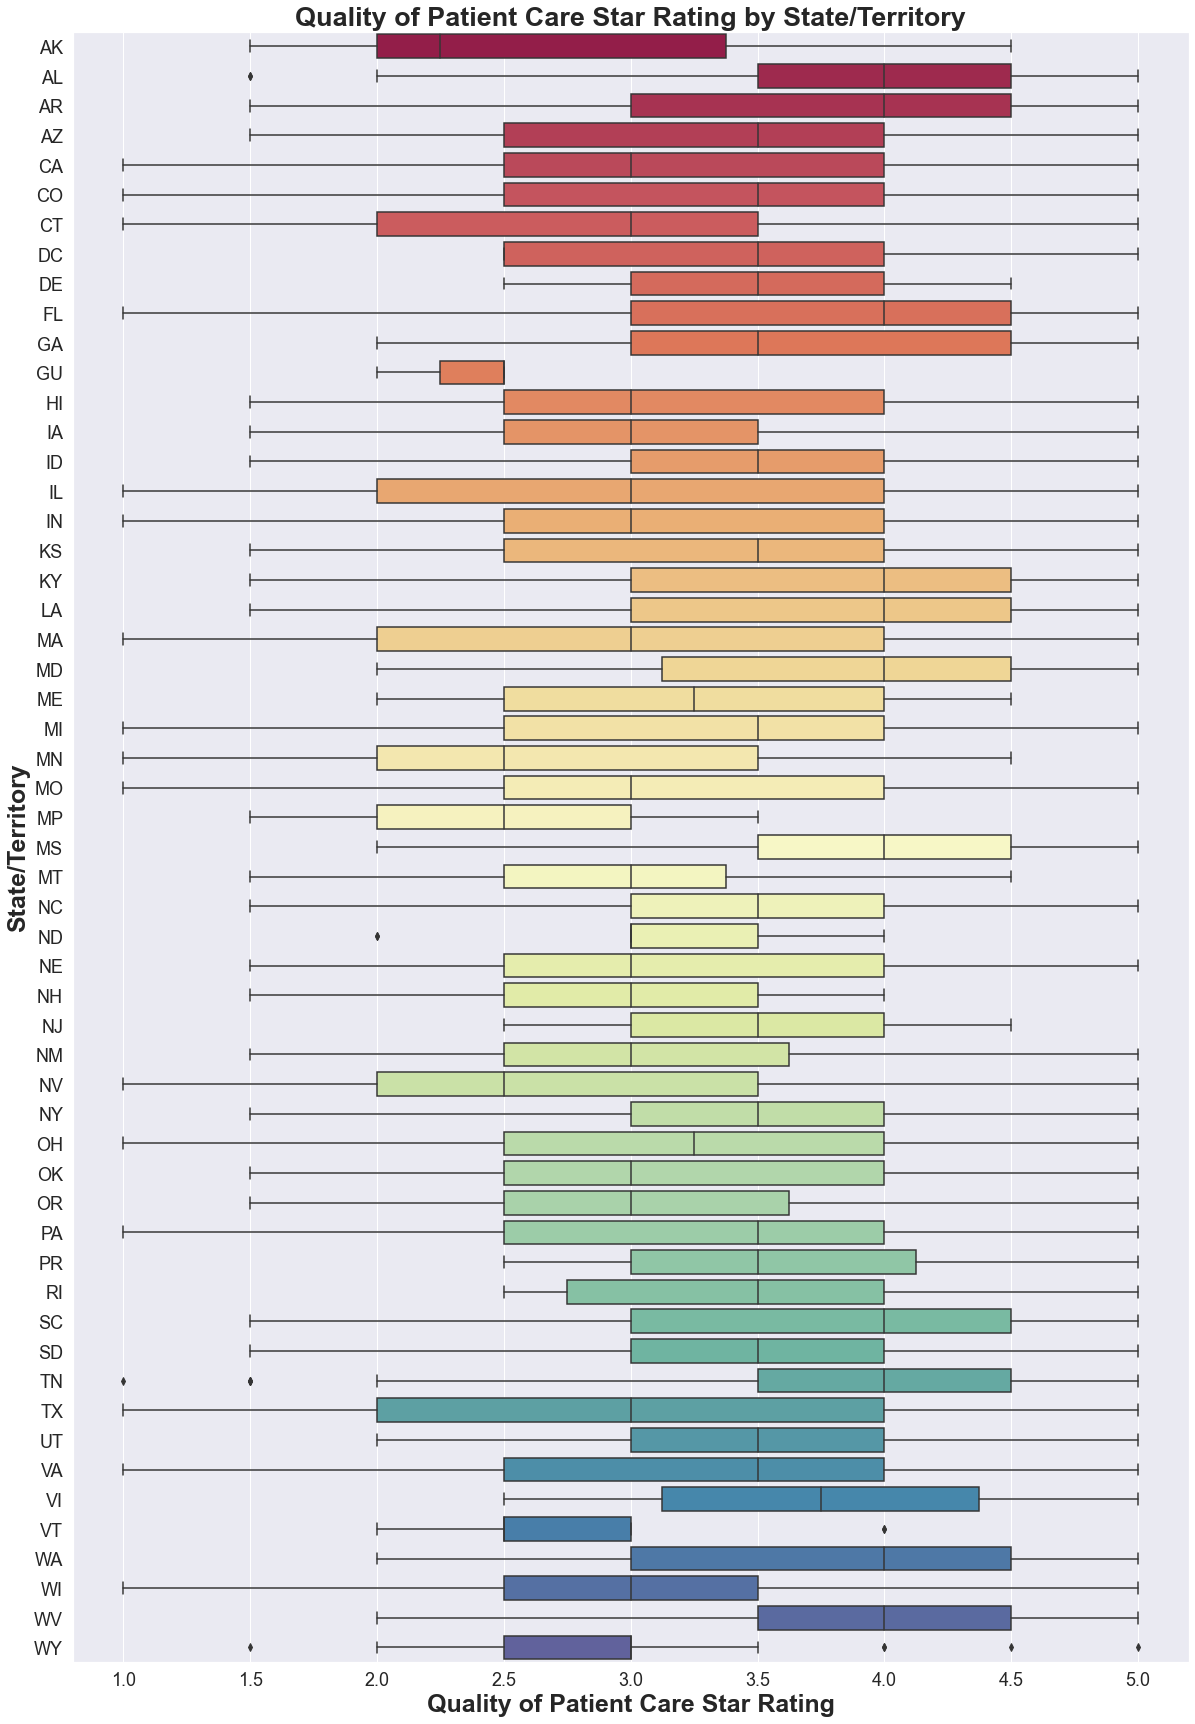

In [30]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=star_rating_state_clean_df, x='Quality of patient care star rating', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Quality of Patient Care Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Quality of Patient Care Star Rating by State/Territory', size = 27, fontweight = 'bold')


### Quality Star Rating Based on Type of Ownership
* GOVERNMENT - COMBINATION GOVT & VOLUNTARY
* GOVERNMENT - LOCAL
* GOVERNMENT - STATE/COUNTY
* PROPRIETARY
* VOLUNTARY NON-PROFIT - OTHER
* VOLUNTARY NON-PROFIT - PRIVATE
* VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION


In [31]:
# Create the star_rating_too_df DataFrame.
star_rating_too_df = df[['Type of Ownership',
                    'Quality of patient care star rating', 
                     'How often the home health team began their patients care in a timely manner',
                    'How often patients got better at walking or moving around',
                    'How often patients got better at getting in and out of bed',
                    'How often patients got better at bathing',
                    'How often patients breathing improved',
                    'How often patients got better at taking their drugs correctly by mouth',
                    'How often home health patients had to be admitted to the hospital']].copy()
star_rating_too_df.head().style.set_properties(**{'text-align': 'right'})

In [32]:
star_rating_too_df.tail().style.set_properties(**{'text-align': 'right'})


In [33]:
star_rating_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [34]:
star_rating_too_clean_df = star_rating_too_df.dropna()
star_rating_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [35]:
# Create star_rating__only_too_clean_df DataFrame.
star_rating_only_too_clean_df = star_rating_too_clean_df[['Type of Ownership',
                    'Quality of patient care star rating']].copy()
star_rating_only_too_clean_df.head().style.set_properties(**{'text-align': 'right'})


In [36]:
# Total of ownership type for each type
total_ownership_type_by_type = star_rating_too_clean_df.groupby(['Type of Ownership']).count()['Quality of patient care star rating']
total_ownership_type_by_type


Type of Ownership
GOVERNMENT - COMBINATION GOVT & VOLUNTARY         10
GOVERNMENT - LOCAL                                85
GOVERNMENT - STATE/COUNTY                        145
PROPRIETARY                                     5252
VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION     270
VOLUNTARY NON-PROFIT - OTHER                     434
VOLUNTARY NON-PROFIT - PRIVATE                   524
Name: Quality of patient care star rating, dtype: int64

In [37]:
# Create a Type of Ownership summary using .groupby

star_rating_too_clean_df.groupby(['Type of Ownership']).agg({'Quality of patient care star rating':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Quality of Patient Care Star Rating by Type of Ownership')

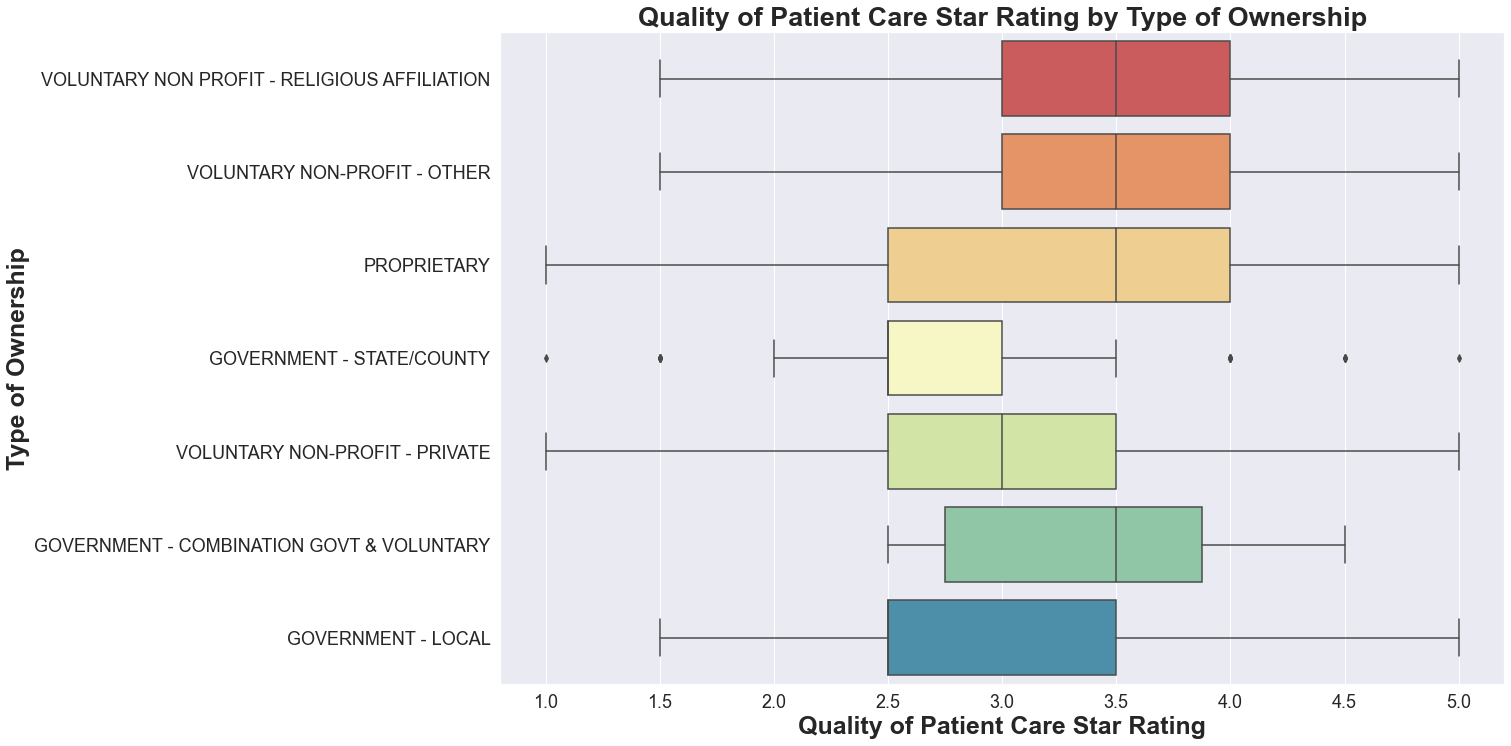

In [38]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=star_rating_only_too_clean_df, x='Quality of patient care star rating', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Quality of Patient Care Star Rating', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Quality of Patient Care Star Rating by Type of Ownership', size = 27, fontweight = 'bold')


In [39]:
# Create a Type of Ownership DataFrame for each type

gov_combo_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - COMBINATION GOVT & VOLUNTARY']

gov_loc_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - LOCAL']

gov_state_county_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'GOVERNMENT - STATE/COUNTY']

prop_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'PROPRIETARY']

vol_non_prof_rel_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON PROFIT - RELIGIOUS AFFILIATION']

vol_non_prof_other_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - OTHER']

vol_non_prof_priv_df = star_rating_too_clean_df[star_rating_too_clean_df["Type of Ownership"] == 'VOLUNTARY NON-PROFIT - PRIVATE']


In [40]:
gov_combo_df.head().style.set_properties(**{'text-align': 'right'})


In [41]:
gov_combo_df.describe().style.set_properties(**{'text-align': 'right'})


In [42]:
gov_combo_star_rating = pd.DataFrame(gov_combo_df['Quality of patient care star rating'].value_counts())
gov_combo_star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Government Combination Quality Star Rating Distribution')

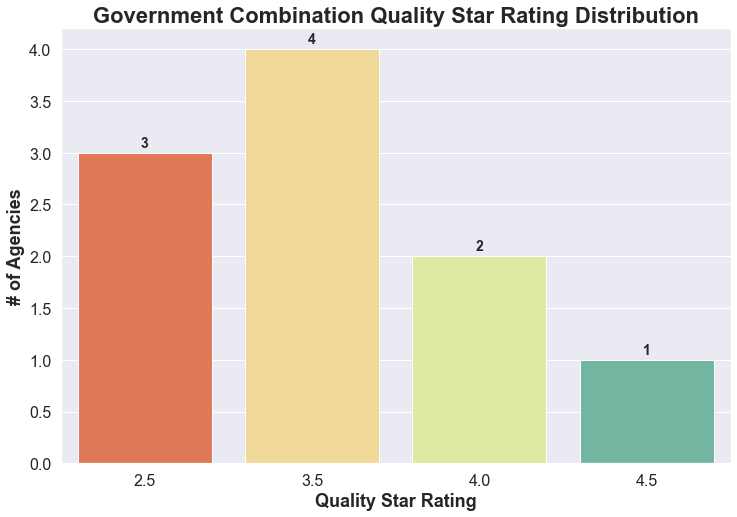

In [43]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_combo_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government Combination Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [44]:
gov_loc_df.head().style.set_properties(**{'text-align': 'right'})


In [45]:
gov_loc_df.describe().style.set_properties(**{'text-align': 'right'})


In [46]:
gov_loc_star_rating = pd.DataFrame(gov_loc_df['Quality of patient care star rating'].value_counts())
gov_loc_star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Government Local Quality Star Rating Distribution')

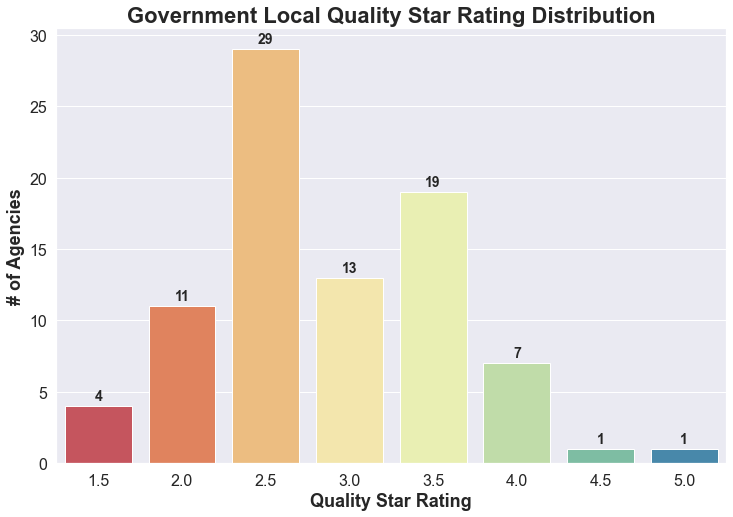

In [47]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_loc_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government Local Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [48]:
gov_state_county_df.head().style.set_properties(**{'text-align': 'right'})


In [49]:
gov_state_county_df.describe().style.set_properties(**{'text-align': 'right'})


In [50]:
gov_state_county_star_rating = pd.DataFrame(gov_state_county_df['Quality of patient care star rating'].value_counts())
gov_state_county_star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Government State/County Quality Star Rating Distribution')

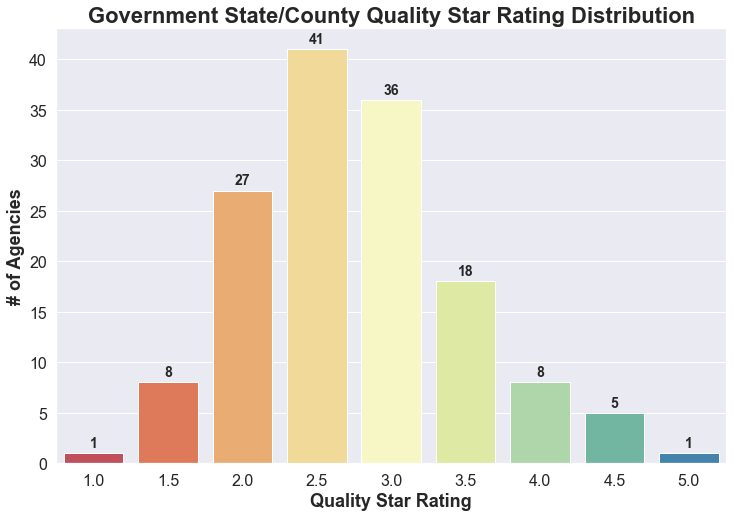

In [51]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = gov_state_county_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Government State/County Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [52]:
prop_df.head().style.set_properties(**{'text-align': 'right'})


In [53]:
prop_df.describe().style.set_properties(**{'text-align': 'right'})


In [54]:
prop_star_rating = pd.DataFrame(prop_df['Quality of patient care star rating'].value_counts())
prop_star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Proprietary Quality Star Rating Distribution')

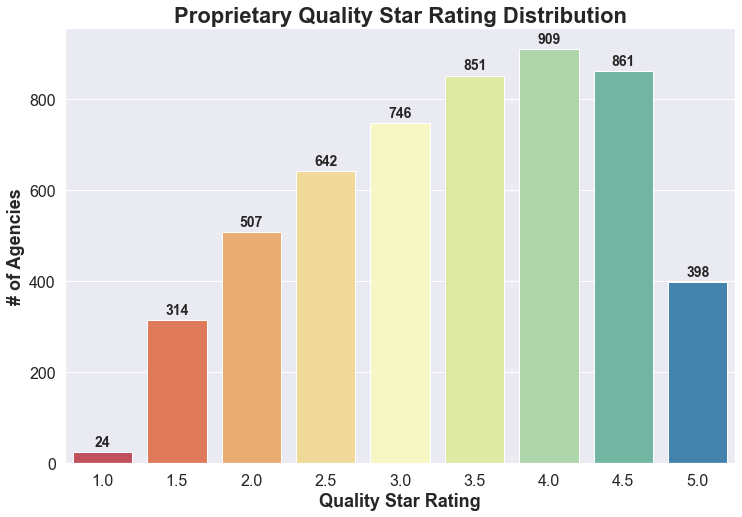

In [55]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = prop_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Proprietary Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [56]:
vol_non_prof_rel_df.head().style.set_properties(**{'text-align': 'right'})


In [57]:
vol_non_prof_rel_df.describe().style.set_properties(**{'text-align': 'right'})


In [58]:
vol_non_prof_rel_star_rating = pd.DataFrame(vol_non_prof_rel_df['Quality of patient care star rating'].value_counts())
vol_non_prof_rel_star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Voluntary Non-Profit Religious Quality Star Rating Distribution')

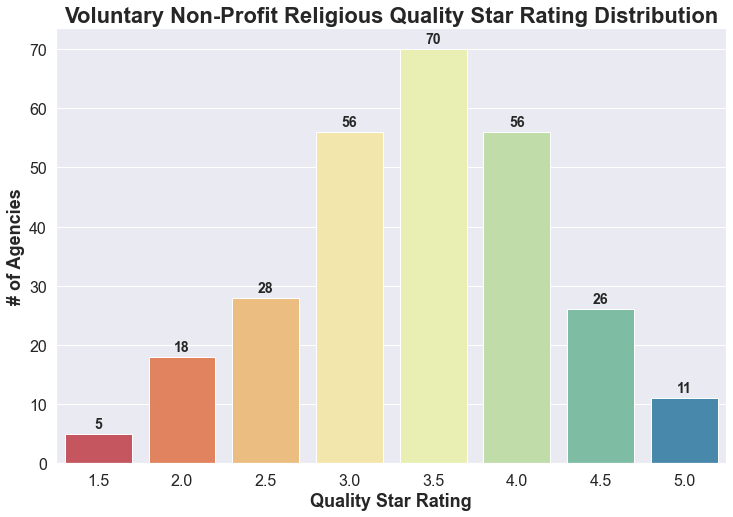

In [59]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_rel_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Religious Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [60]:
vol_non_prof_other_df.head().style.set_properties(**{'text-align': 'right'})


In [61]:
vol_non_prof_other_df.describe().style.set_properties(**{'text-align': 'right'})


In [62]:
vol_non_prof_other_star_rating = pd.DataFrame(vol_non_prof_other_df['Quality of patient care star rating'].value_counts())
vol_non_prof_other_star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Voluntary Non-Profit Other Quality Star Rating Distribution')

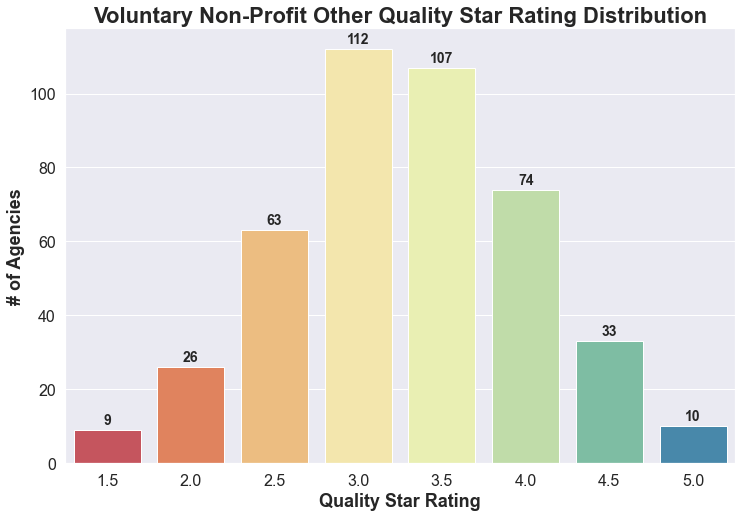

In [63]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_other_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Other Quality Star Rating Distribution', size = 22, fontweight = 'bold')


In [64]:
vol_non_prof_priv_df.head().style.set_properties(**{'text-align': 'right'})


In [65]:
vol_non_prof_priv_df.describe().style.set_properties(**{'text-align': 'right'})


In [66]:
vol_non_prof_priv_star_rating = pd.DataFrame(vol_non_prof_priv_df['Quality of patient care star rating'].value_counts())
vol_non_prof_priv_star_rating.style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Voluntary Non-Profit Private Quality Star Rating Distribution')

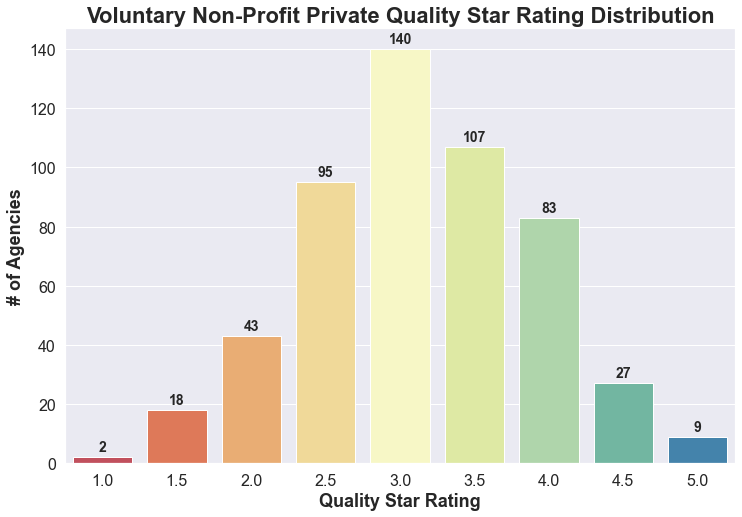

In [67]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x = 'Quality of patient care star rating', data = vol_non_prof_priv_df, palette = 'Spectral')
ax.bar_label(ax.containers[0], label_type='edge', fontsize = 14, fontweight = 'bold', padding = 3)
plt.xticks(rotation = 0, size = 16)
plt.yticks(size = 16)
plt.xlabel('Quality Star Rating', size = 18, fontweight = 'bold')
plt.ylabel('# of Agencies', size = 18, fontweight = 'bold')
plt.title('Voluntary Non-Profit Private Quality Star Rating Distribution', size = 22, fontweight = 'bold')


## Publically Reported Measures *NOT* Included in the Star Rating Measure (10)

### These measures include the following:
* How often the home health team taught patients (or their family caregivers) about their drugs
* How often the home health team determined whether patients received a flu shot for the current flu season
* How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted
* Changes in skin integrity post-acute care: pressure ulcer/injury
* How often physician-recommended actions to address medication issues were completely timely
* Percent of Residents Experiencing One or More Falls with Major Injury
* Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function
* Discharge to Community (DTC) Risk-Standardized Rate
* Potentially Preventable 30-Day Post Discharge Readmission (PPR) Risk-Standardized Rate
* How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally


### Home Health Team Teaching Patients About Their Drugs


In [68]:
# Create the teach_drugs_nat_df DataFrame.
teach_drugs_nat_df = df[['How often the home health team taught patients (or their family caregivers) about their drugs']].copy()
teach_drugs_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [69]:
teach_drugs_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [70]:
teach_drugs_nat_clean_df = teach_drugs_nat_df.dropna()
teach_drugs_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Patients Taught About Their Drugs')

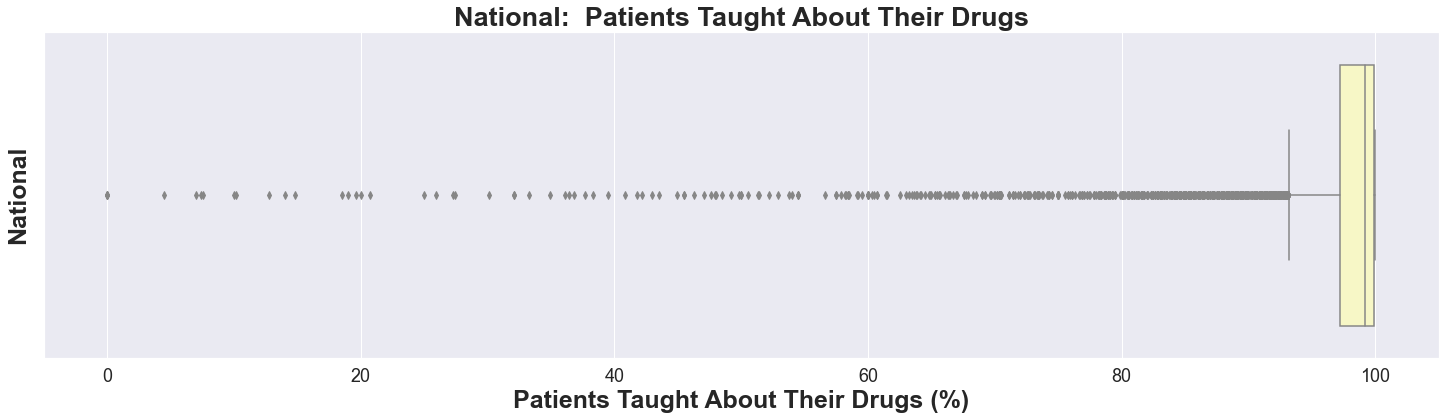

In [71]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=teach_drugs_nat_clean_df, x='How often the home health team taught patients (or their family caregivers) about their drugs', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patients Taught About Their Drugs (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Patients Taught About Their Drugs', size = 27, fontweight = 'bold')


In [72]:
# Create the teach_drugs_state_df DataFrame.
teach_drugs_state_df = df[['State',
                    'How often the home health team taught patients (or their family caregivers) about their drugs']].copy()
teach_drugs_state_df.head().style.set_properties(**{'text-align': 'right'})


In [73]:
teach_drugs_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [74]:
teach_drugs_state_clean_df = teach_drugs_state_df.dropna()
teach_drugs_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [75]:
# Create a teach_drugs_state_clean_df summary using .groupby
teach_drugs_state_clean_df.groupby(['State']).agg({'How often the home health team taught patients (or their family caregivers) about their drugs':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Patients Taught About Their Drugs by State/Territory')

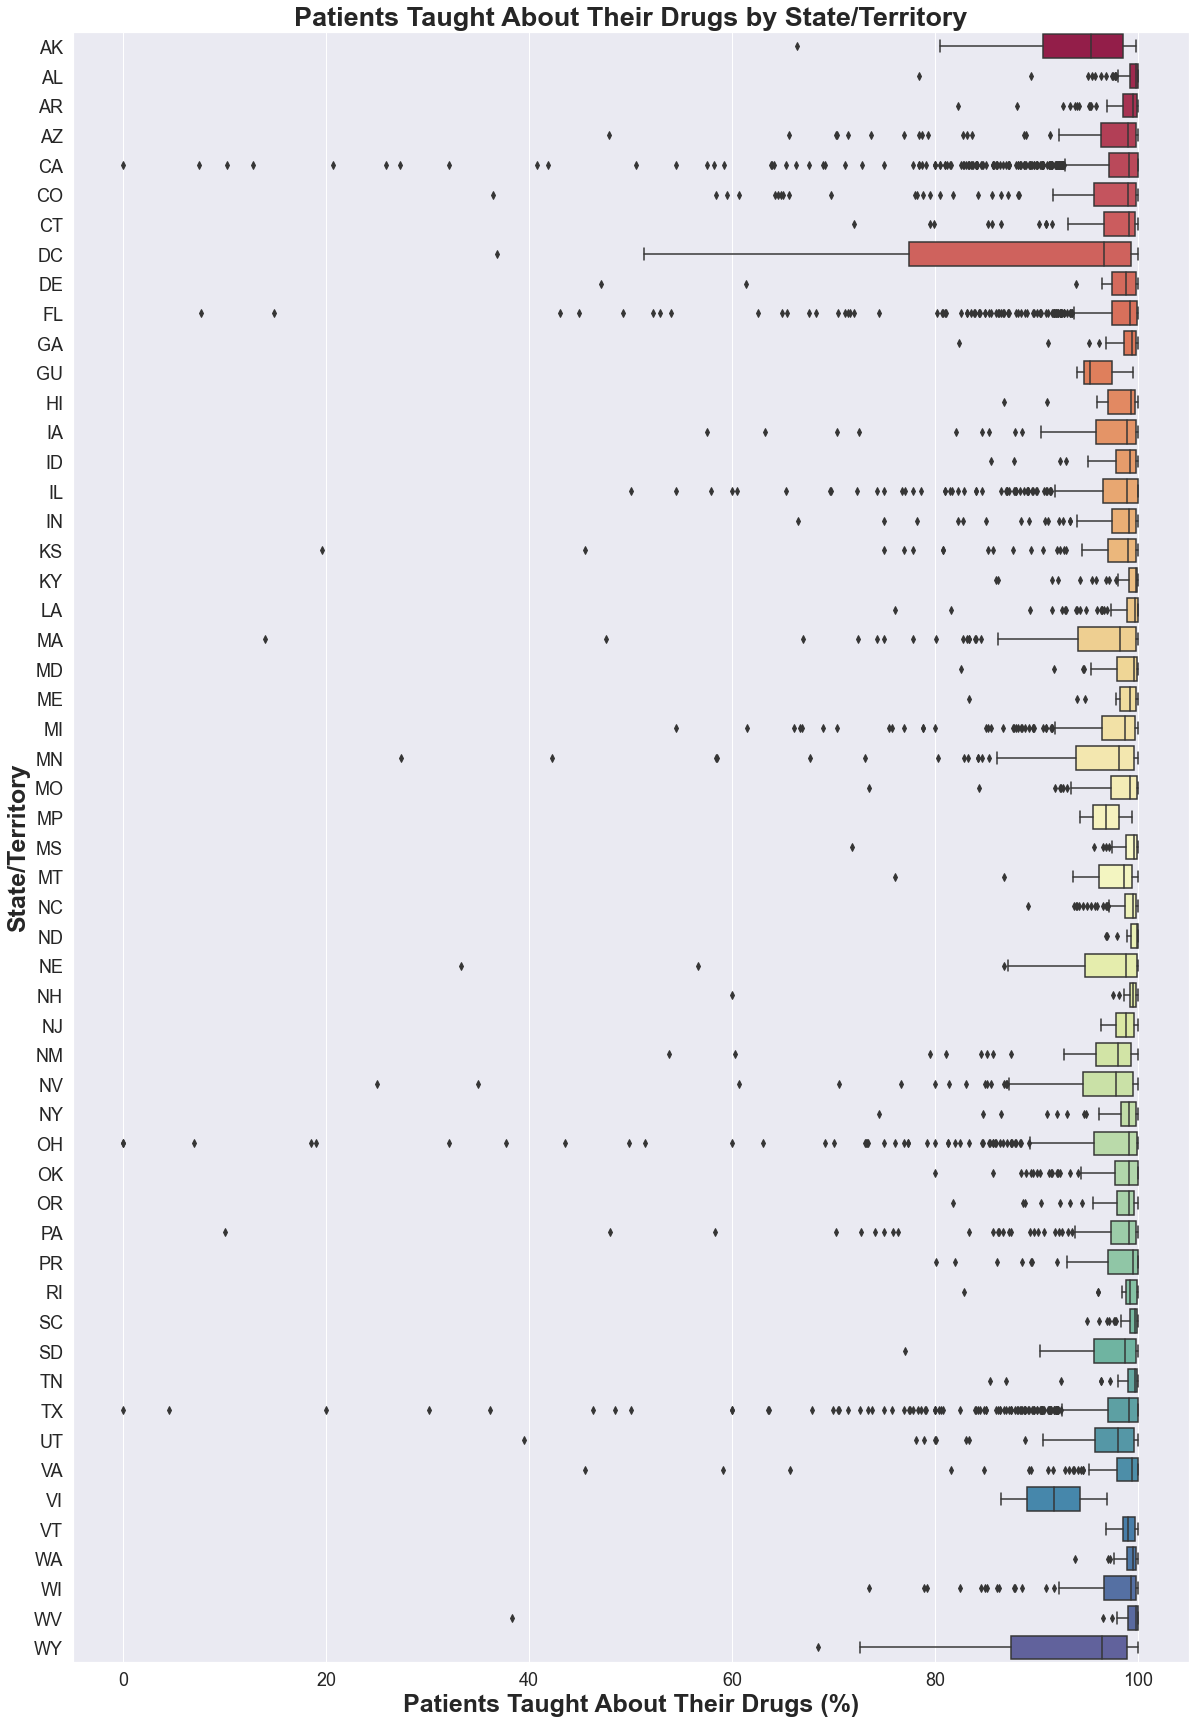

In [76]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=teach_drugs_state_clean_df, x='How often the home health team taught patients (or their family caregivers) about their drugs', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patients Taught About Their Drugs (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Patients Taught About Their Drugs by State/Territory', size = 27, fontweight = 'bold')


In [77]:
# Create the teach_drugs_too_df DataFrame.
teach_drugs_too_df = df[['Type of Ownership',
                    'How often the home health team taught patients (or their family caregivers) about their drugs']].copy()
teach_drugs_too_df.head().style.set_properties(**{'text-align': 'right'})


In [78]:
teach_drugs_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [79]:
teach_drugs_too_clean_df = teach_drugs_too_df.dropna()
teach_drugs_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [80]:
teach_drugs_too_clean_df.shape


(8399, 2)

In [81]:
teach_drugs_too_clean_df = teach_drugs_too_clean_df.loc[(teach_drugs_too_clean_df['Type of Ownership'] != '-')]

In [82]:
teach_drugs_too_clean_df.shape

(8378, 2)

In [83]:
# Create a teach_drugs_too_clean_df summary using .groupby
teach_drugs_too_clean_df.groupby(['Type of Ownership']).agg({'How often the home health team taught patients (or their family caregivers) about their drugs':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Patients Taught About Their Drugs by Type of Ownership')

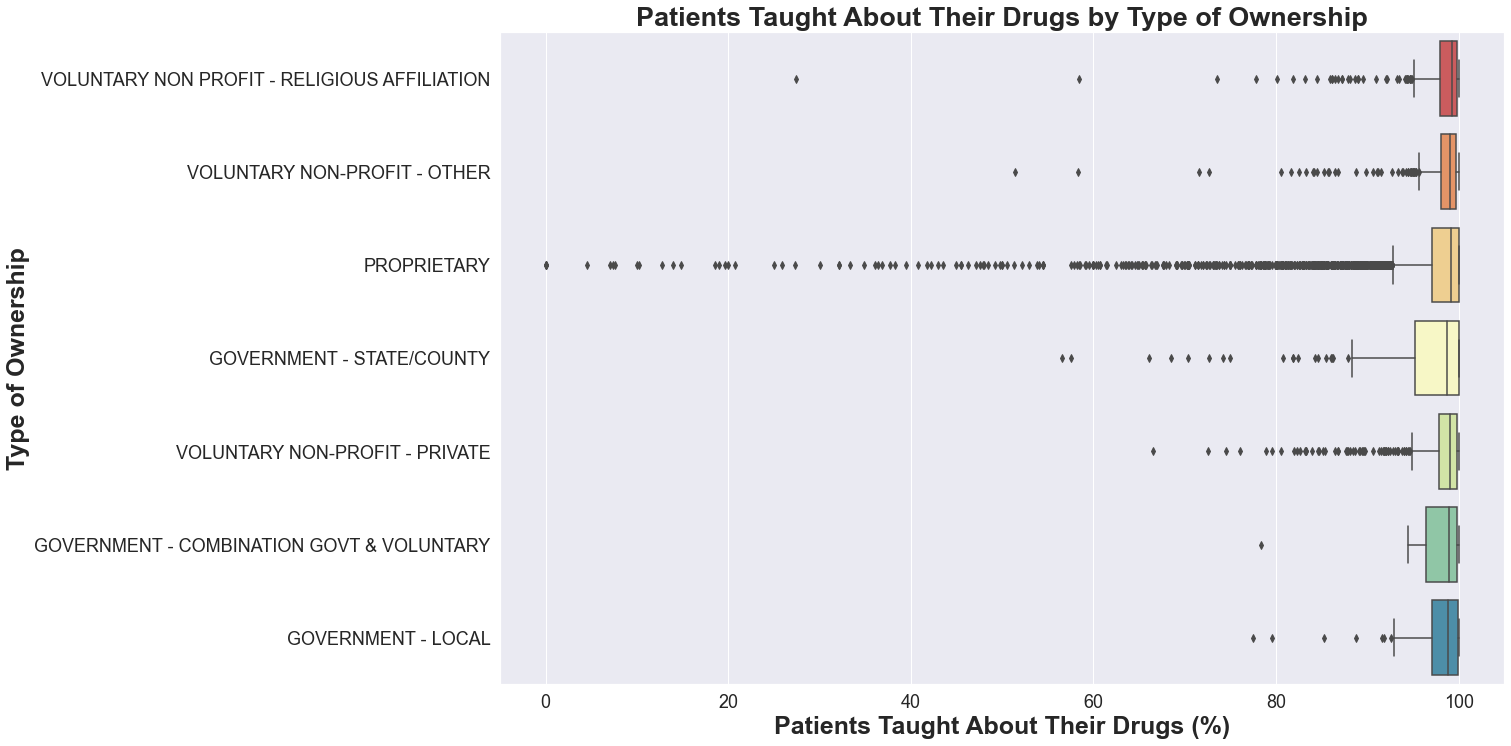

In [84]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=teach_drugs_too_clean_df, x='How often the home health team taught patients (or their family caregivers) about their drugs', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Patients Taught About Their Drugs (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Patients Taught About Their Drugs by Type of Ownership', size = 27, fontweight = 'bold')


### How Often the Home Health Team Determined Whether Patients Received a Flu Shot for the Current Flu Season

In [85]:
# Create the flu_shot_nat_df DataFrame.
flu_shot_nat_df = df[['How often the home health team determined whether patients received a flu shot for the current flu season']].copy()
flu_shot_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [86]:
flu_shot_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [87]:
flu_shot_nat_clean_df = flu_shot_nat_df.dropna()
flu_shot_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Flu Shot for the Current Flu Season')

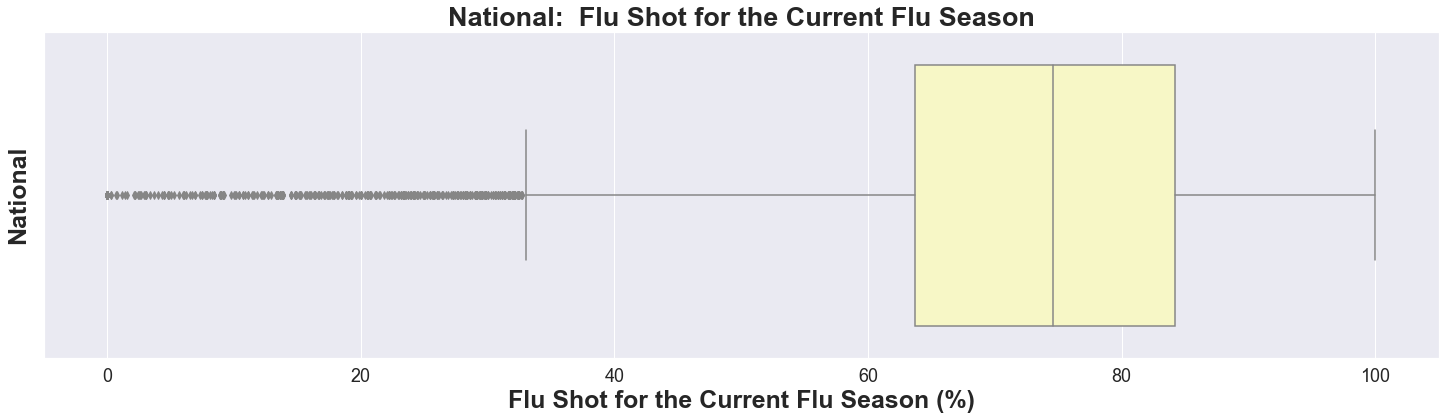

In [88]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=flu_shot_nat_clean_df, x='How often the home health team determined whether patients received a flu shot for the current flu season', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Flu Shot for the Current Flu Season (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Flu Shot for the Current Flu Season', size = 27, fontweight = 'bold')


In [89]:
# Create the flu_shot_state_df DataFrame.
flu_shot_state_df = df[['State',
                    'How often the home health team determined whether patients received a flu shot for the current flu season']].copy()
flu_shot_state_df.head().style.set_properties(**{'text-align': 'right'})


In [90]:
flu_shot_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [91]:
flu_shot_state_clean_df = flu_shot_state_df.dropna()
flu_shot_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [92]:
# Create a flu_shot_state_clean_df summary using .groupby
flu_shot_state_clean_df.groupby(['State']).agg({'How often the home health team determined whether patients received a flu shot for the current flu season':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Flu Shot for the Current Flu Season by State/Territory')

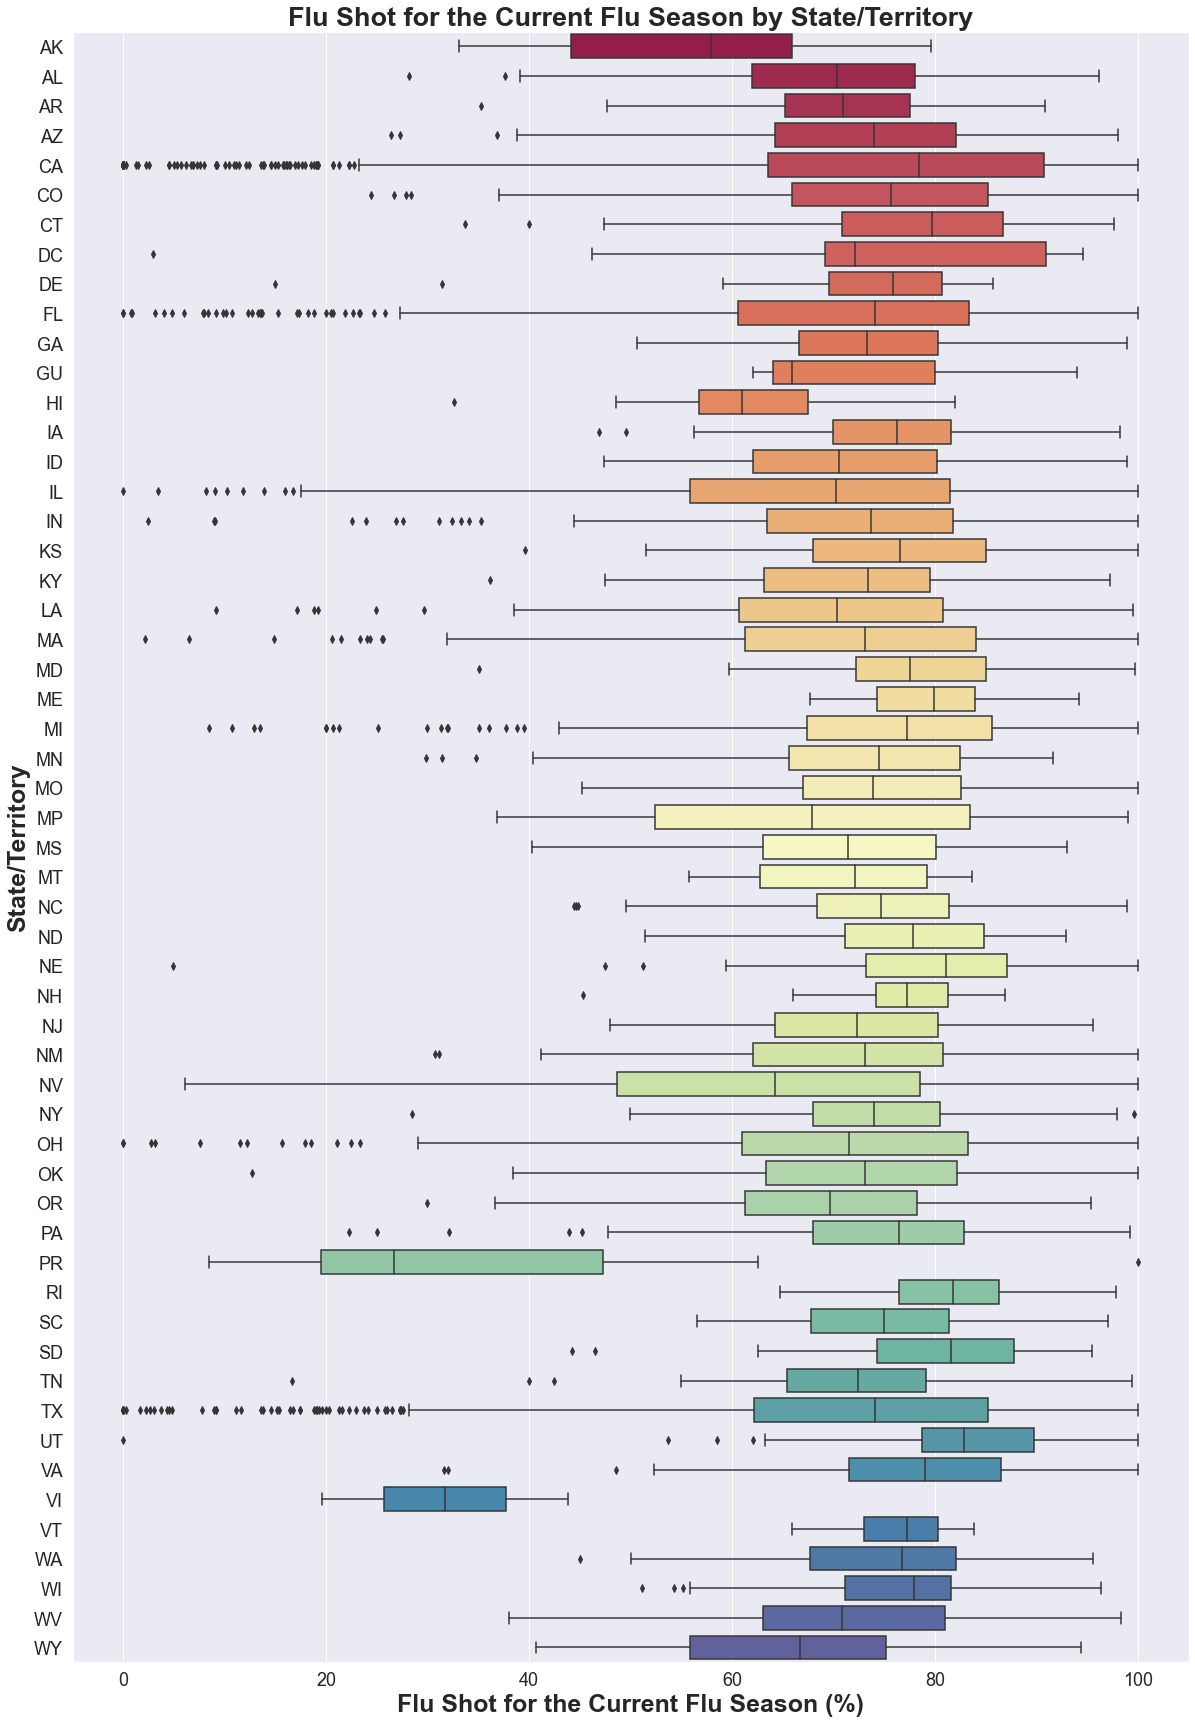

In [93]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=flu_shot_state_clean_df, x='How often the home health team determined whether patients received a flu shot for the current flu season', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Flu Shot for the Current Flu Season (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Flu Shot for the Current Flu Season by State/Territory', size = 27, fontweight = 'bold')


In [94]:
# Create the flu_shot_too_df DataFrame.
flu_shot_too_df = df[['Type of Ownership',
                    'How often the home health team determined whether patients received a flu shot for the current flu season']].copy()
flu_shot_too_df.head().style.set_properties(**{'text-align': 'right'})


In [95]:
flu_shot_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [96]:
flu_shot_too_clean_df = flu_shot_too_df.dropna()
flu_shot_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [97]:
flu_shot_too_clean_df.shape


(8075, 2)

In [98]:
flu_shot_too_clean_df.isna().sum()

Type of Ownership                                                                                            0
How often the home health team determined whether patients received a flu shot for the current flu season    0
dtype: int64

In [99]:
flu_shot_too_clean_df = flu_shot_too_clean_df.loc[(flu_shot_too_clean_df['Type of Ownership'] != '-')]


In [100]:
flu_shot_too_clean_df.shape


(8054, 2)

In [101]:
# Create a flu_shot_too_clean_df summary using .groupby
flu_shot_too_clean_df.groupby(['Type of Ownership']).agg({'How often the home health team determined whether patients received a flu shot for the current flu season':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Flu Shot for the Current Flu Season by Type of Ownership')

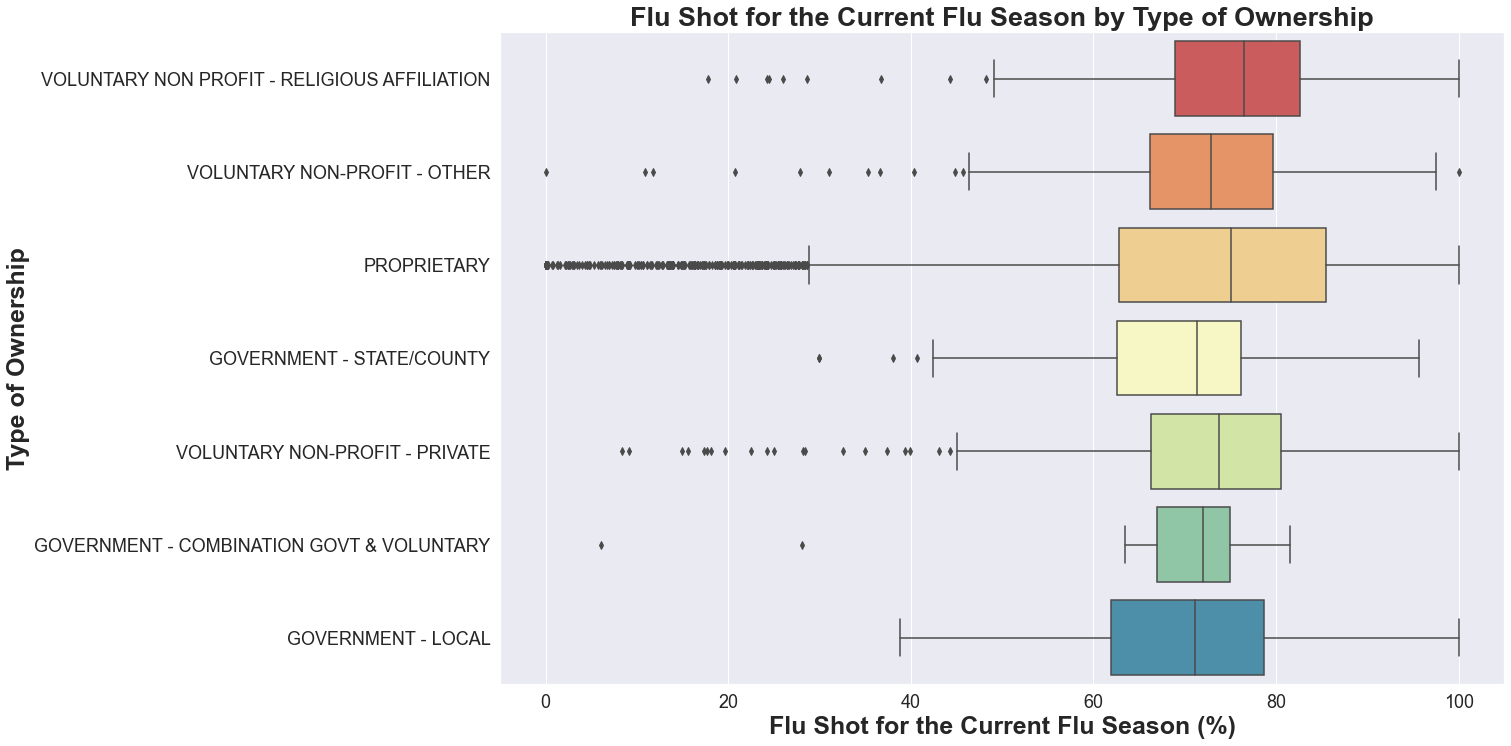

In [102]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=flu_shot_too_clean_df, x='How often the home health team determined whether patients received a flu shot for the current flu season', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Flu Shot for the Current Flu Season (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Flu Shot for the Current Flu Season by Type of Ownership', size = 27, fontweight = 'bold')


### Patients Needed Urgent, Unplanned Care in the ER without Being Admitted


In [103]:
# Create the urgent_er_nat_df DataFrame.
urgent_er_nat_df = df[['How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted']].copy()
urgent_er_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [104]:
urgent_er_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [105]:
urgent_er_nat_clean_df = urgent_er_nat_df.dropna()
urgent_er_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Urgent, Unplanned Care in the ER without being Admitted')

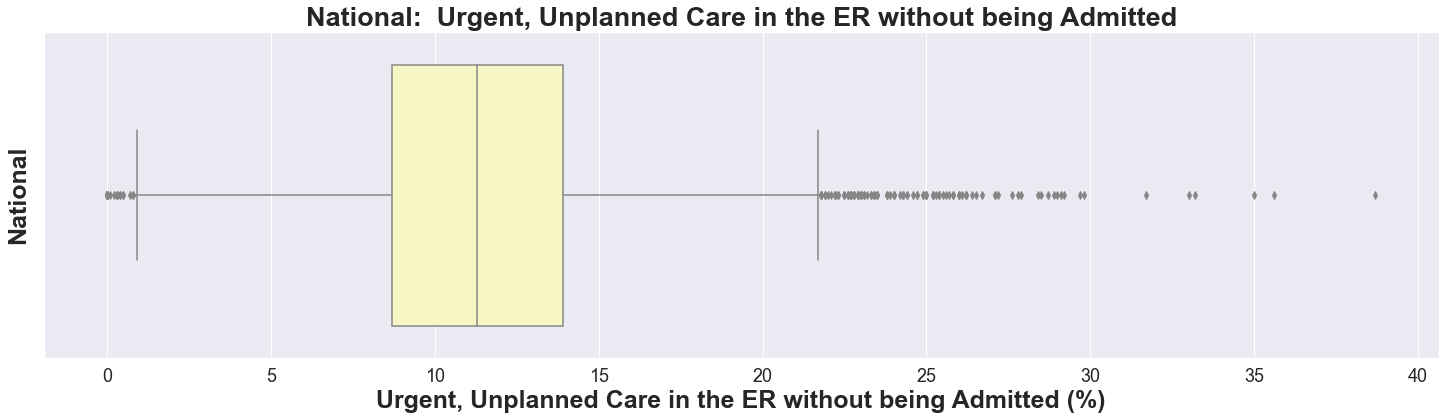

In [106]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=urgent_er_nat_clean_df, x='How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Urgent, Unplanned Care in the ER without being Admitted (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Urgent, Unplanned Care in the ER without being Admitted', size = 27, fontweight = 'bold')


In [107]:
# Create the urgent_er_state_df DataFrame.
urgent_er_state_df = df[['State',
                    'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted']].copy()
urgent_er_state_df.head().style.set_properties(**{'text-align': 'right'})


In [108]:
urgent_er_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [109]:
urgent_er_state_clean_df = urgent_er_state_df.dropna()
urgent_er_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [110]:
# Create a urgent_er_state_clean_df summary using .groupby
urgent_er_state_clean_df.groupby(['State']).agg({'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Urgent, Unplanned Care in the ER without being Admitted by State/Territory')

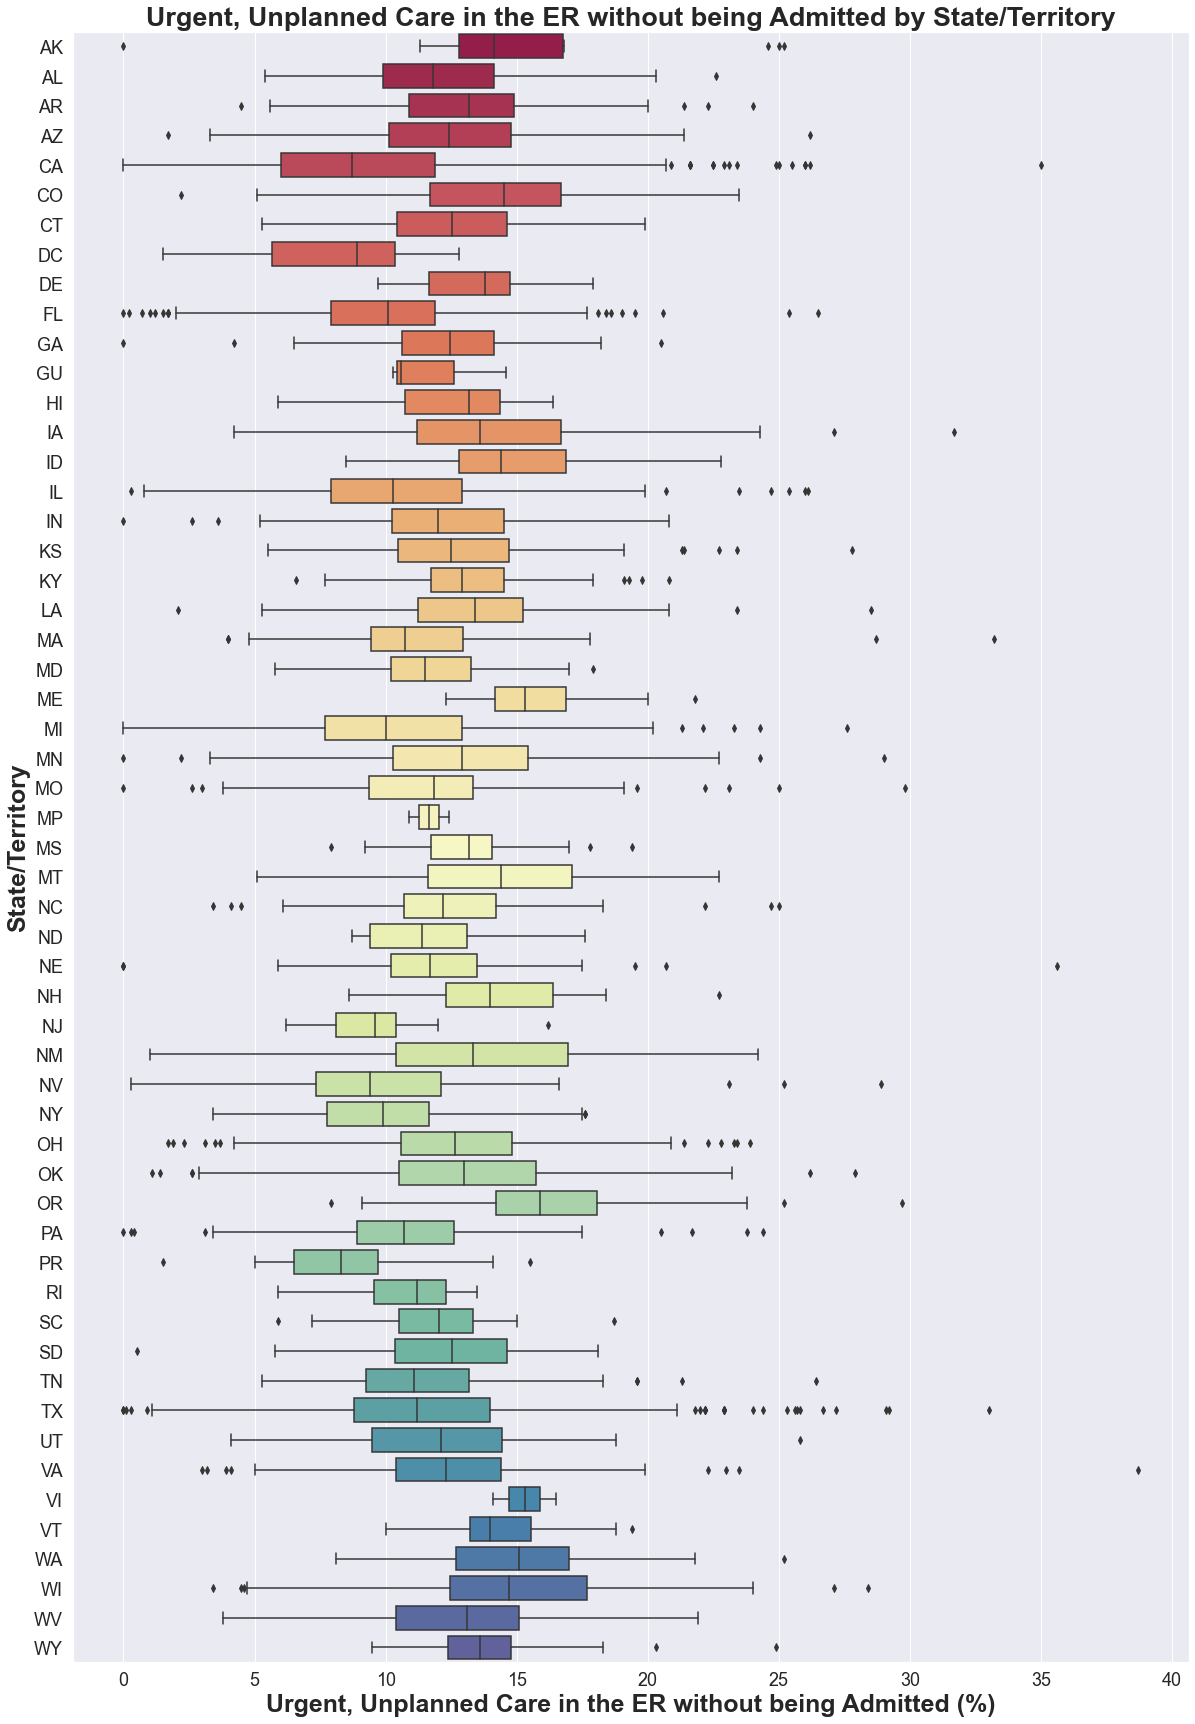

In [111]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=urgent_er_state_clean_df, x='How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Urgent, Unplanned Care in the ER without being Admitted (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Urgent, Unplanned Care in the ER without being Admitted by State/Territory', size = 27, fontweight = 'bold')


In [112]:
# Create the urgent_er_too_df DataFrame.
urgent_er_too_df = df[['Type of Ownership',
                    'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted']].copy()
urgent_er_too_df.head().style.set_properties(**{'text-align': 'right'})


In [113]:
urgent_er_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [114]:
urgent_er_too_clean_df = urgent_er_too_df.dropna()
urgent_er_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [115]:
urgent_er_too_clean_df.shape


(6861, 2)

In [116]:
urgent_er_too_clean_df = urgent_er_too_clean_df.loc[(urgent_er_too_clean_df['Type of Ownership'] != '-')]
urgent_er_too_clean_df.shape


(6861, 2)

In [117]:
# Create a urgent_er_too_clean_df summary using .groupby
urgent_er_too_clean_df.groupby(['Type of Ownership']).agg({'How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Urgent, Unplanned Care in the ER without being Admitted by Type of Ownership')

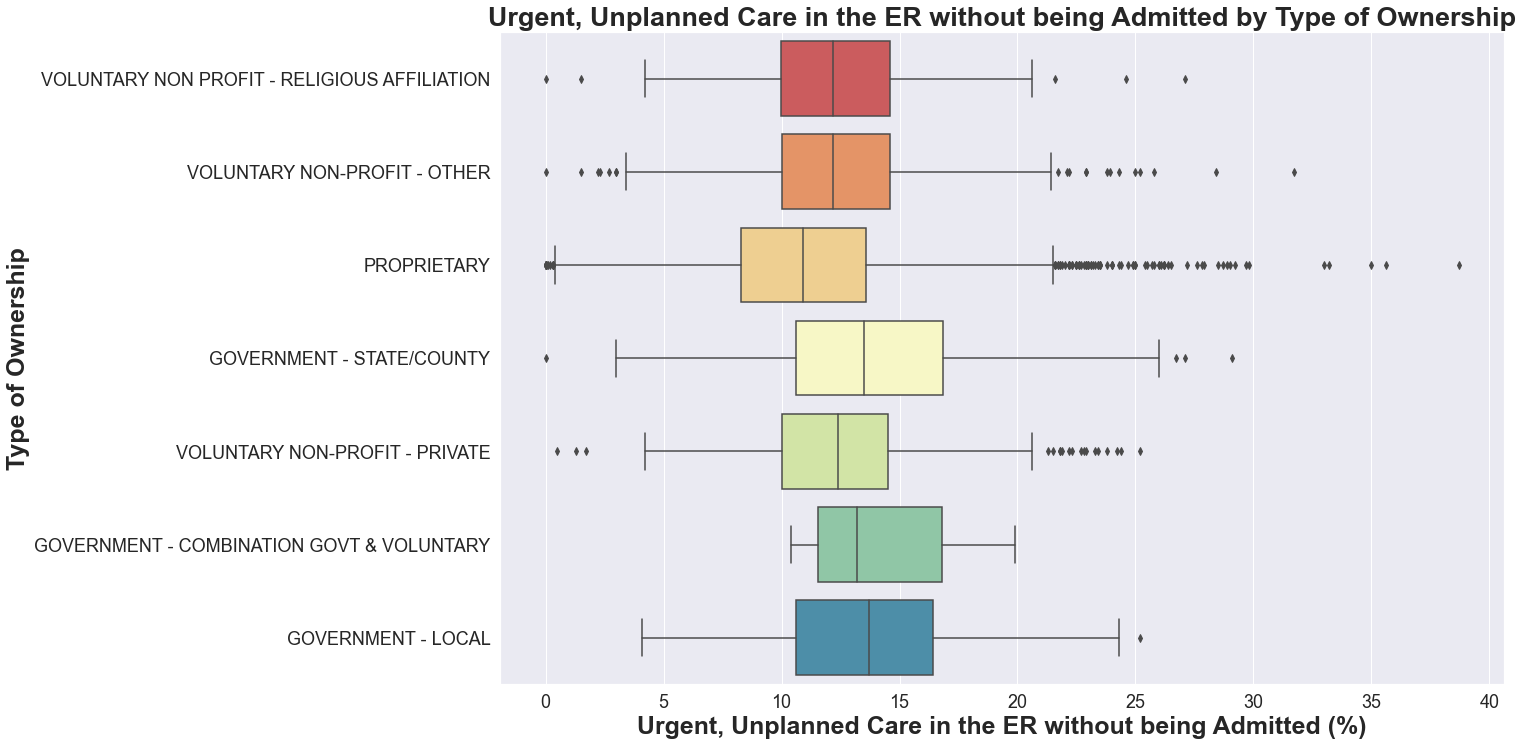

In [118]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=urgent_er_too_clean_df, x='How often patients receiving home health care needed urgent, unplanned care in the ER without being admitted', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Urgent, Unplanned Care in the ER without being Admitted (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Urgent, Unplanned Care in the ER without being Admitted by Type of Ownership', size = 27, fontweight = 'bold')


### Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury


In [119]:
# Create the pres_ulcer_nat_df DataFrame.
pres_ulcer_nat_df = df[['Changes in skin integrity post-acute care: pressure ulcer/injury']].copy()
pres_ulcer_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [120]:
pres_ulcer_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [121]:
pres_ulcer_nat_clean_df = pres_ulcer_nat_df.dropna()
pres_ulcer_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury')

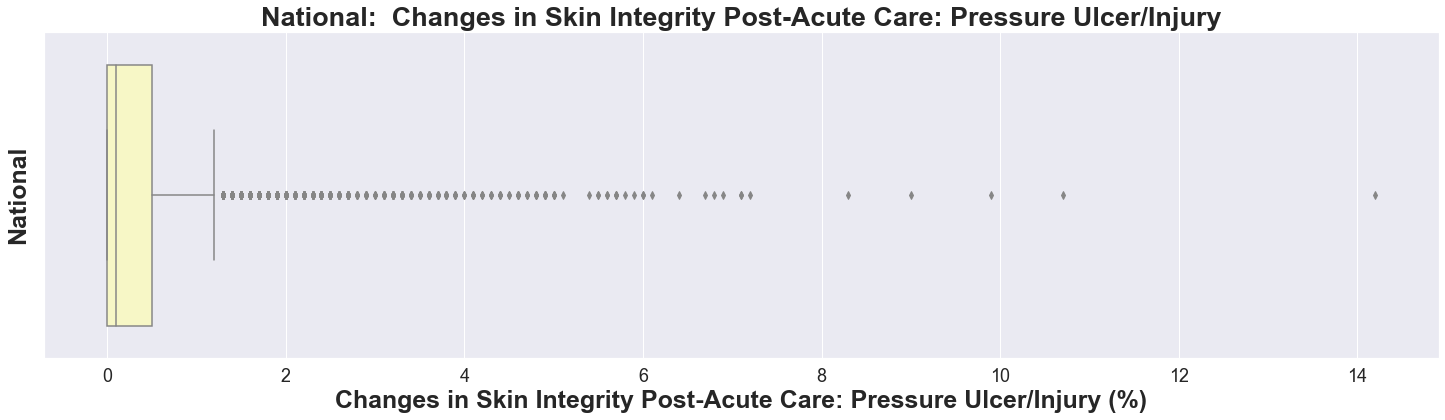

In [122]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=pres_ulcer_nat_clean_df, x='Changes in skin integrity post-acute care: pressure ulcer/injury', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury', size = 27, fontweight = 'bold')


In [123]:
# Create the pres_ulcer_state_df DataFrame.
pres_ulcer_state_df = df[['State',
                    'Changes in skin integrity post-acute care: pressure ulcer/injury']].copy()
pres_ulcer_state_df.head().style.set_properties(**{'text-align': 'right'})


In [124]:
pres_ulcer_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [125]:
pres_ulcer_state_clean_df = pres_ulcer_state_df.dropna()
pres_ulcer_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [126]:
# Create a pres_ulcer_state_clean_df summary using .groupby
pres_ulcer_state_clean_df.groupby(['State']).agg({'Changes in skin integrity post-acute care: pressure ulcer/injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury by State/Territory')

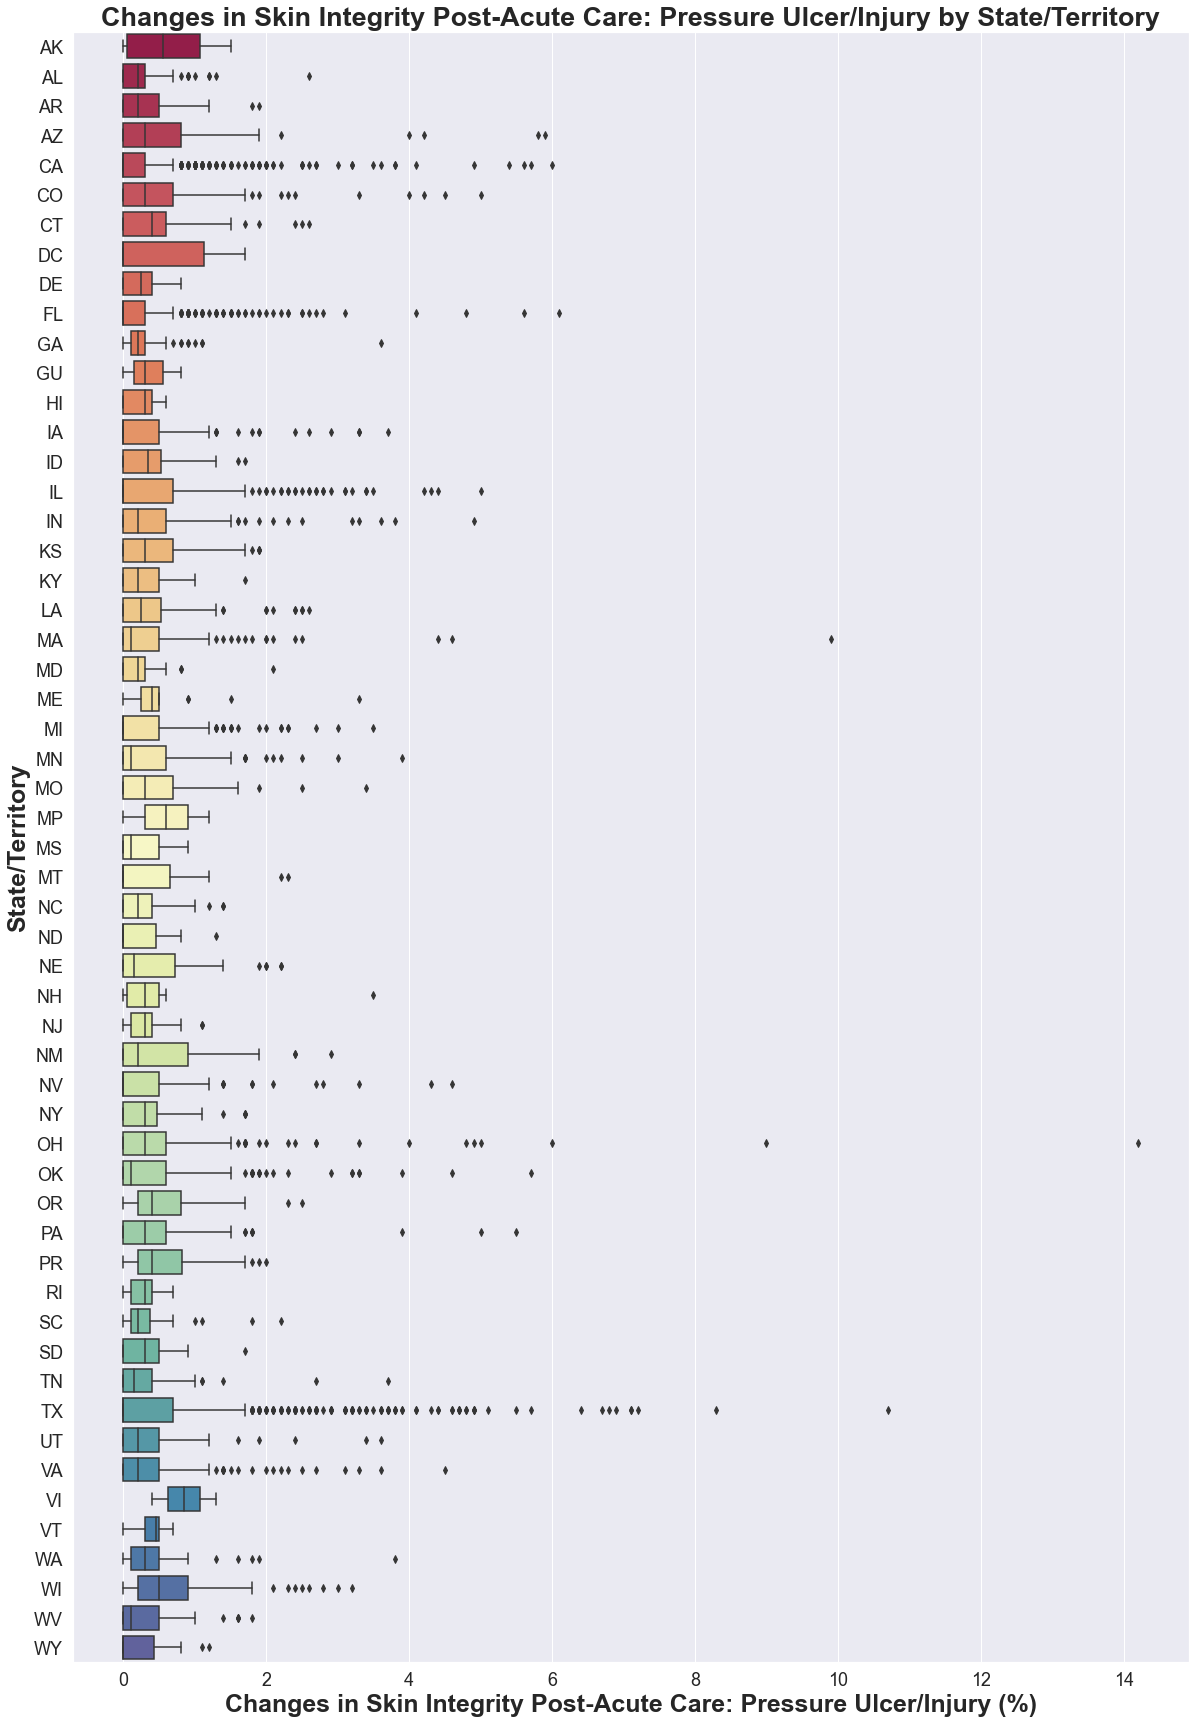

In [127]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=pres_ulcer_state_clean_df, x='Changes in skin integrity post-acute care: pressure ulcer/injury', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury by State/Territory', size = 27, fontweight = 'bold')


In [128]:
# Create the pres_ulcer_too_df DataFrame.
pres_ulcer_too_df = df[['Type of Ownership',
                    'Changes in skin integrity post-acute care: pressure ulcer/injury']].copy()
pres_ulcer_too_df.head().style.set_properties(**{'text-align': 'right'})


In [129]:
pres_ulcer_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [130]:
pres_ulcer_too_clean_df = pres_ulcer_too_df.dropna()
pres_ulcer_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [131]:
pres_ulcer_too_clean_df.shape


(7915, 2)

In [132]:
pres_ulcer_too_clean_df = pres_ulcer_too_clean_df.loc[(pres_ulcer_too_clean_df['Type of Ownership'] != '-')]
pres_ulcer_too_clean_df.shape


(7900, 2)

In [133]:
# Create a pres_ulcer_too_clean_df summary using .groupby
pres_ulcer_too_clean_df.groupby(['Type of Ownership']).agg({'Changes in skin integrity post-acute care: pressure ulcer/injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury by Type of Ownership')

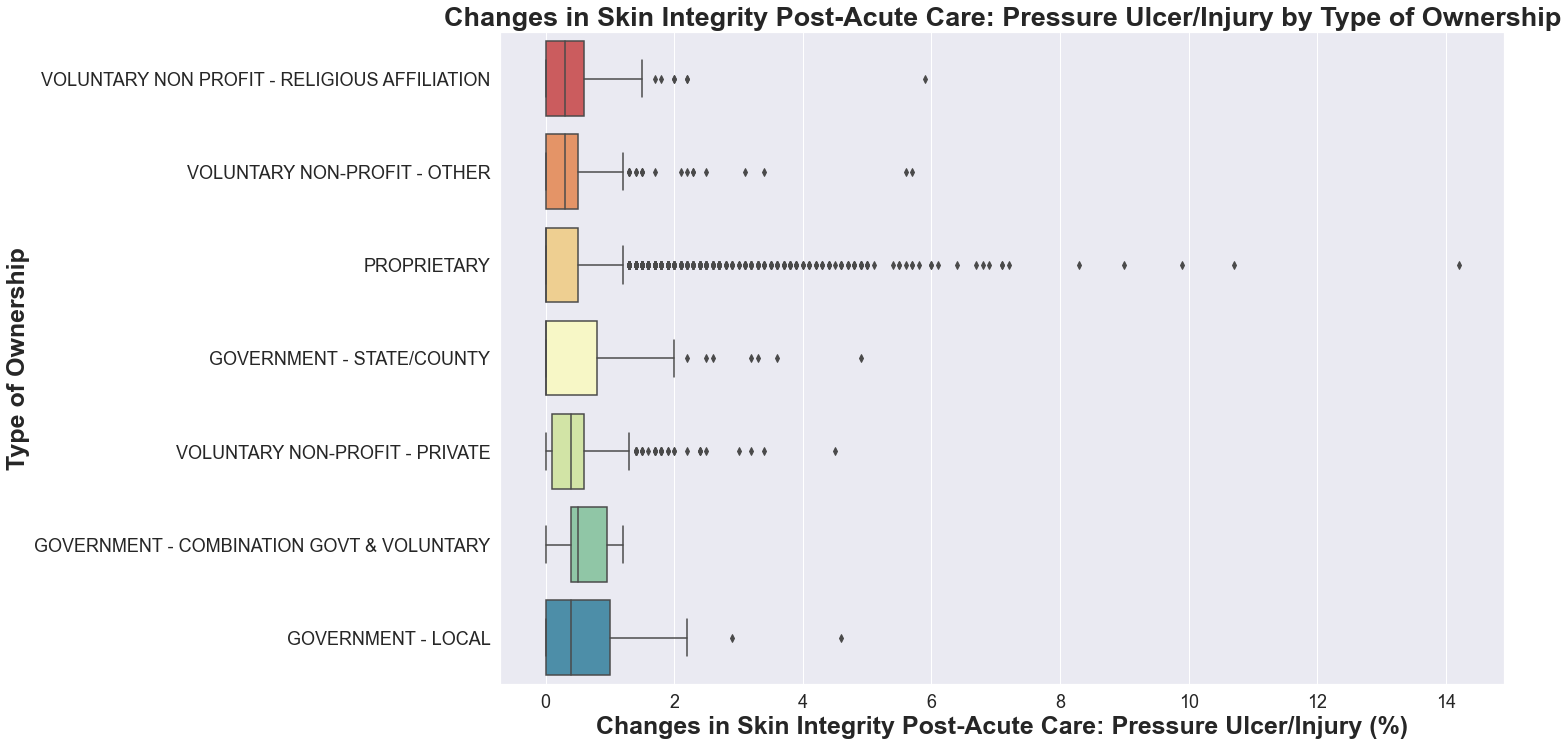

In [134]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=pres_ulcer_too_clean_df, x='Changes in skin integrity post-acute care: pressure ulcer/injury', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Changes in Skin Integrity Post-Acute Care: Pressure Ulcer/Injury by Type of Ownership', size = 27, fontweight = 'bold')


### Physician-Recommended Actions to Address Medication Issues were Completely Timely


In [135]:
# Create the med_time_nat_df DataFrame.
med_time_nat_df = df[['How often physician-recommended actions to address medication issues were completely timely']].copy()
med_time_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [136]:
med_time_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [137]:
med_time_nat_clean_df = med_time_nat_df.dropna()
med_time_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Medication Issues were Completed Timely')

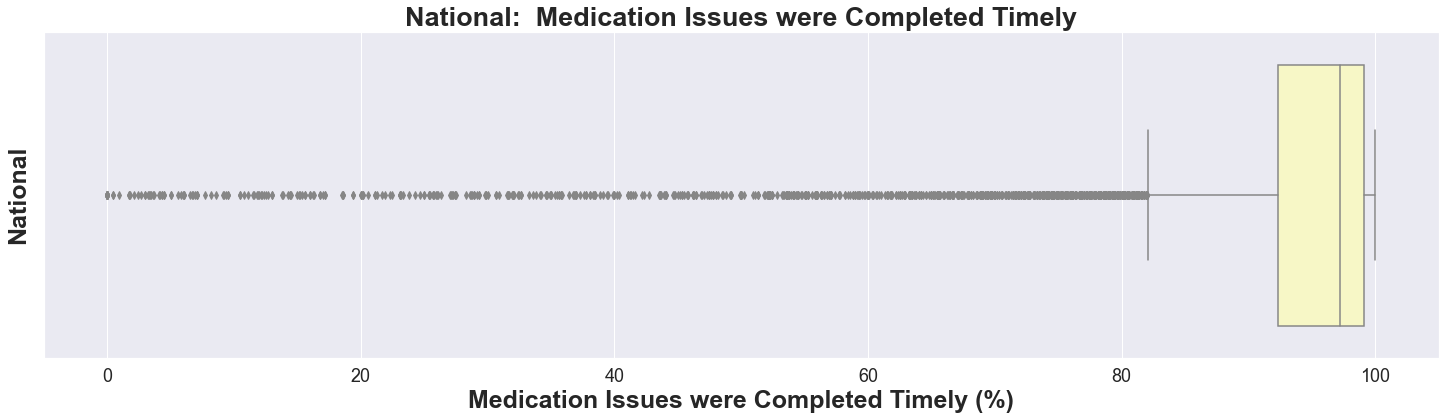

In [138]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=med_time_nat_clean_df, x='How often physician-recommended actions to address medication issues were completely timely', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medication Issues were Completed Timely (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Medication Issues were Completed Timely', size = 27, fontweight = 'bold')


In [139]:
# Create the med_time_state_df DataFrame.
med_time_state_df = df[['State',
                    'How often physician-recommended actions to address medication issues were completely timely']].copy()
med_time_state_df.head().style.set_properties(**{'text-align': 'right'})


In [140]:
med_time_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [141]:
med_time_state_clean_df = med_time_state_df.dropna()
med_time_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [142]:
# Create a med_time_state_clean_df summary using .groupby
med_time_state_clean_df.groupby(['State']).agg({'How often physician-recommended actions to address medication issues were completely timely':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Medication Issues were Completed Timely by State/Territory')

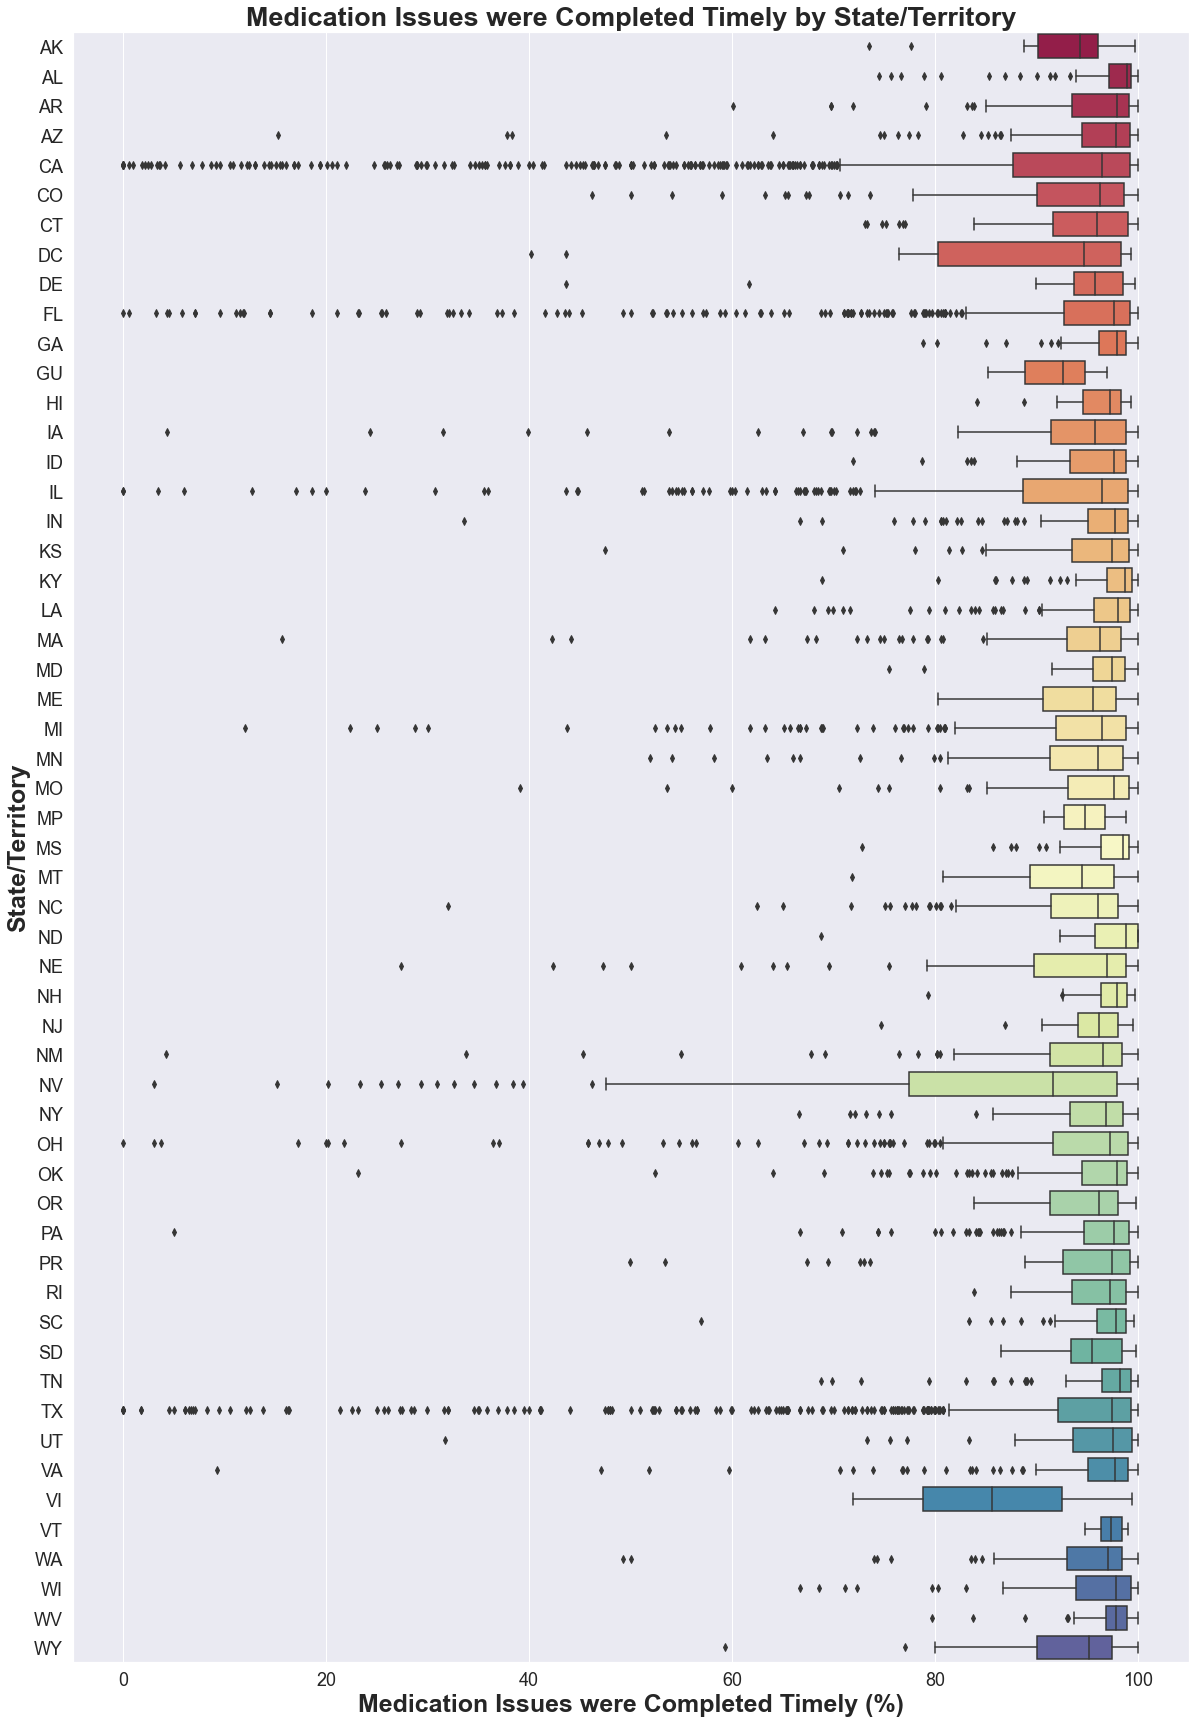

In [143]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=med_time_state_clean_df, x='How often physician-recommended actions to address medication issues were completely timely', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medication Issues were Completed Timely (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Medication Issues were Completed Timely by State/Territory', size = 27, fontweight = 'bold')


In [144]:
# Create the med_time_too_df DataFrame.
med_time_too_df = df[['Type of Ownership',
                    'How often physician-recommended actions to address medication issues were completely timely']].copy()
med_time_too_df.head().style.set_properties(**{'text-align': 'right'})


In [145]:
med_time_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [146]:
med_time_too_clean_df = med_time_too_df.dropna()
med_time_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [147]:
med_time_too_clean_df.shape


(8423, 2)

In [148]:
med_time_too_clean_df = med_time_too_clean_df.loc[(med_time_too_clean_df['Type of Ownership'] != '-')]
med_time_too_clean_df.shape


(8402, 2)

In [149]:
# Create a med_time_too_clean_df summary using .groupby
med_time_too_clean_df.groupby(['Type of Ownership']).agg({'How often physician-recommended actions to address medication issues were completely timely':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Medication Issues were Completed Timely by Type of Ownership')

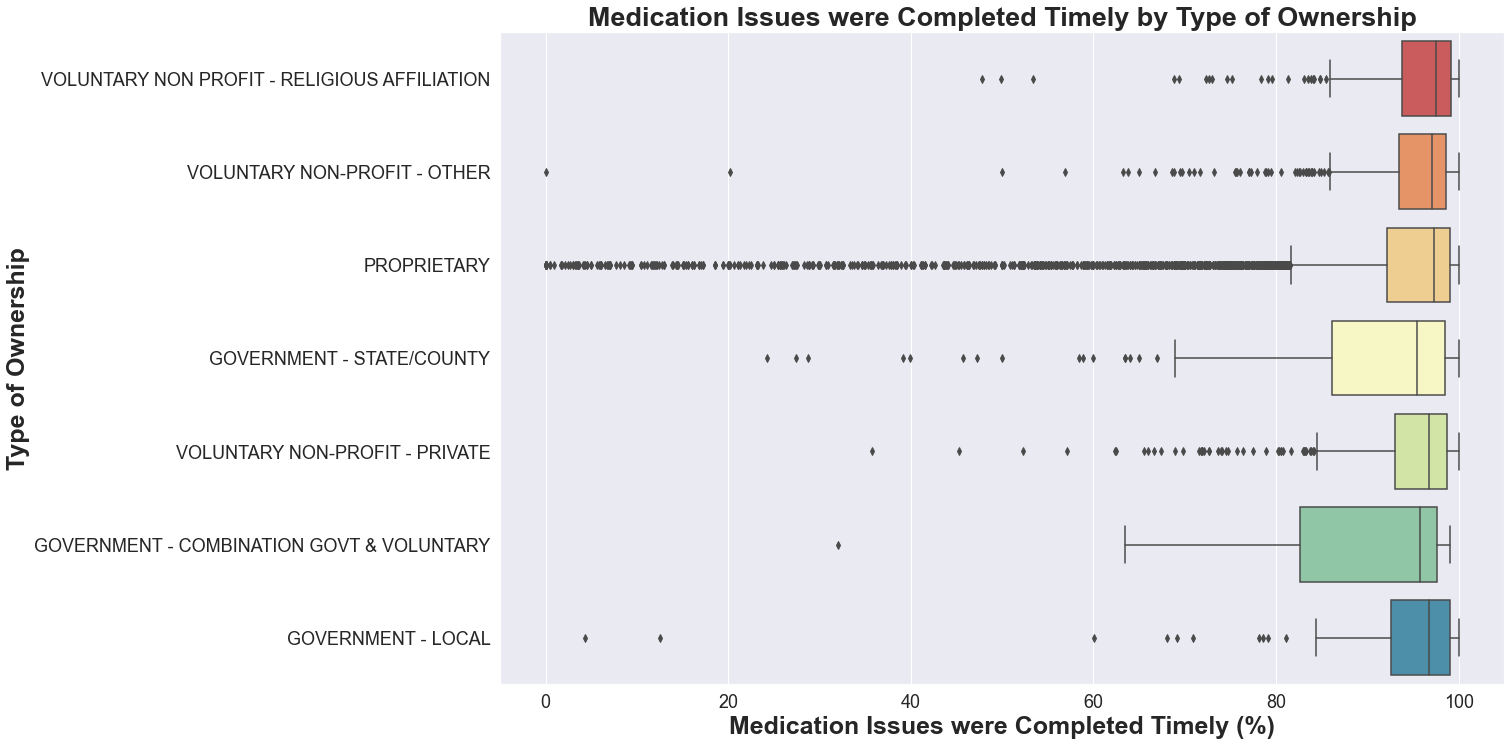

In [150]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=med_time_too_clean_df, x='How often physician-recommended actions to address medication issues were completely timely', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medication Issues were Completed Timely (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Medication Issues were Completed Timely by Type of Ownership', size = 27, fontweight = 'bold')


### Percent of Residents Experiencing One or More Falls with Major Injury


In [151]:
# Create the falls_maj_inj_nat_df DataFrame.
falls_maj_inj_nat_df = df[['Percent of Residents Experiencing One or More Falls with Major Injury']].copy()
falls_maj_inj_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [152]:
falls_maj_inj_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [153]:
falls_maj_inj_nat_clean_df = falls_maj_inj_nat_df.dropna()
falls_maj_inj_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Percent of Residents Experiencing One or More Falls with Major Injury')

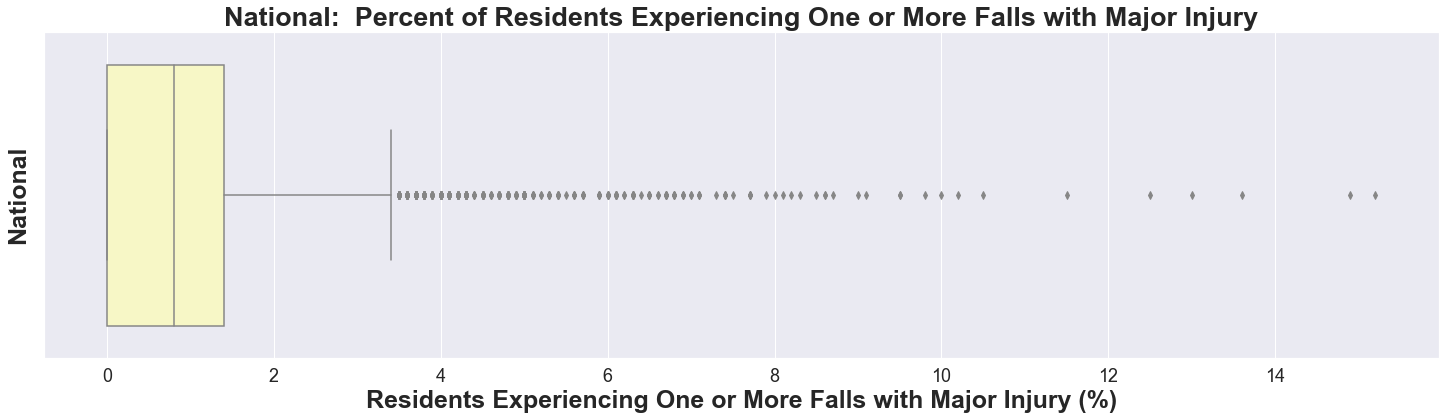

In [154]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=falls_maj_inj_nat_clean_df, x='Percent of Residents Experiencing One or More Falls with Major Injury', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Residents Experiencing One or More Falls with Major Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Percent of Residents Experiencing One or More Falls with Major Injury', size = 27, fontweight = 'bold')


In [155]:
# Create the falls_maj_inj_state_df DataFrame.
falls_maj_inj_state_df = df[['State',
                    'Percent of Residents Experiencing One or More Falls with Major Injury']].copy()
falls_maj_inj_state_df.head().style.set_properties(**{'text-align': 'right'})


In [156]:
falls_maj_inj_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [157]:
falls_maj_inj_state_clean_df = falls_maj_inj_state_df.dropna()
falls_maj_inj_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [158]:
# Create a falls_maj_inj_state_clean_df summary using .groupby
falls_maj_inj_state_clean_df.groupby(['State']).agg({'Percent of Residents Experiencing One or More Falls with Major Injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Percent of Residents Experiencing One or More Falls with Major Injury by State/Territory')

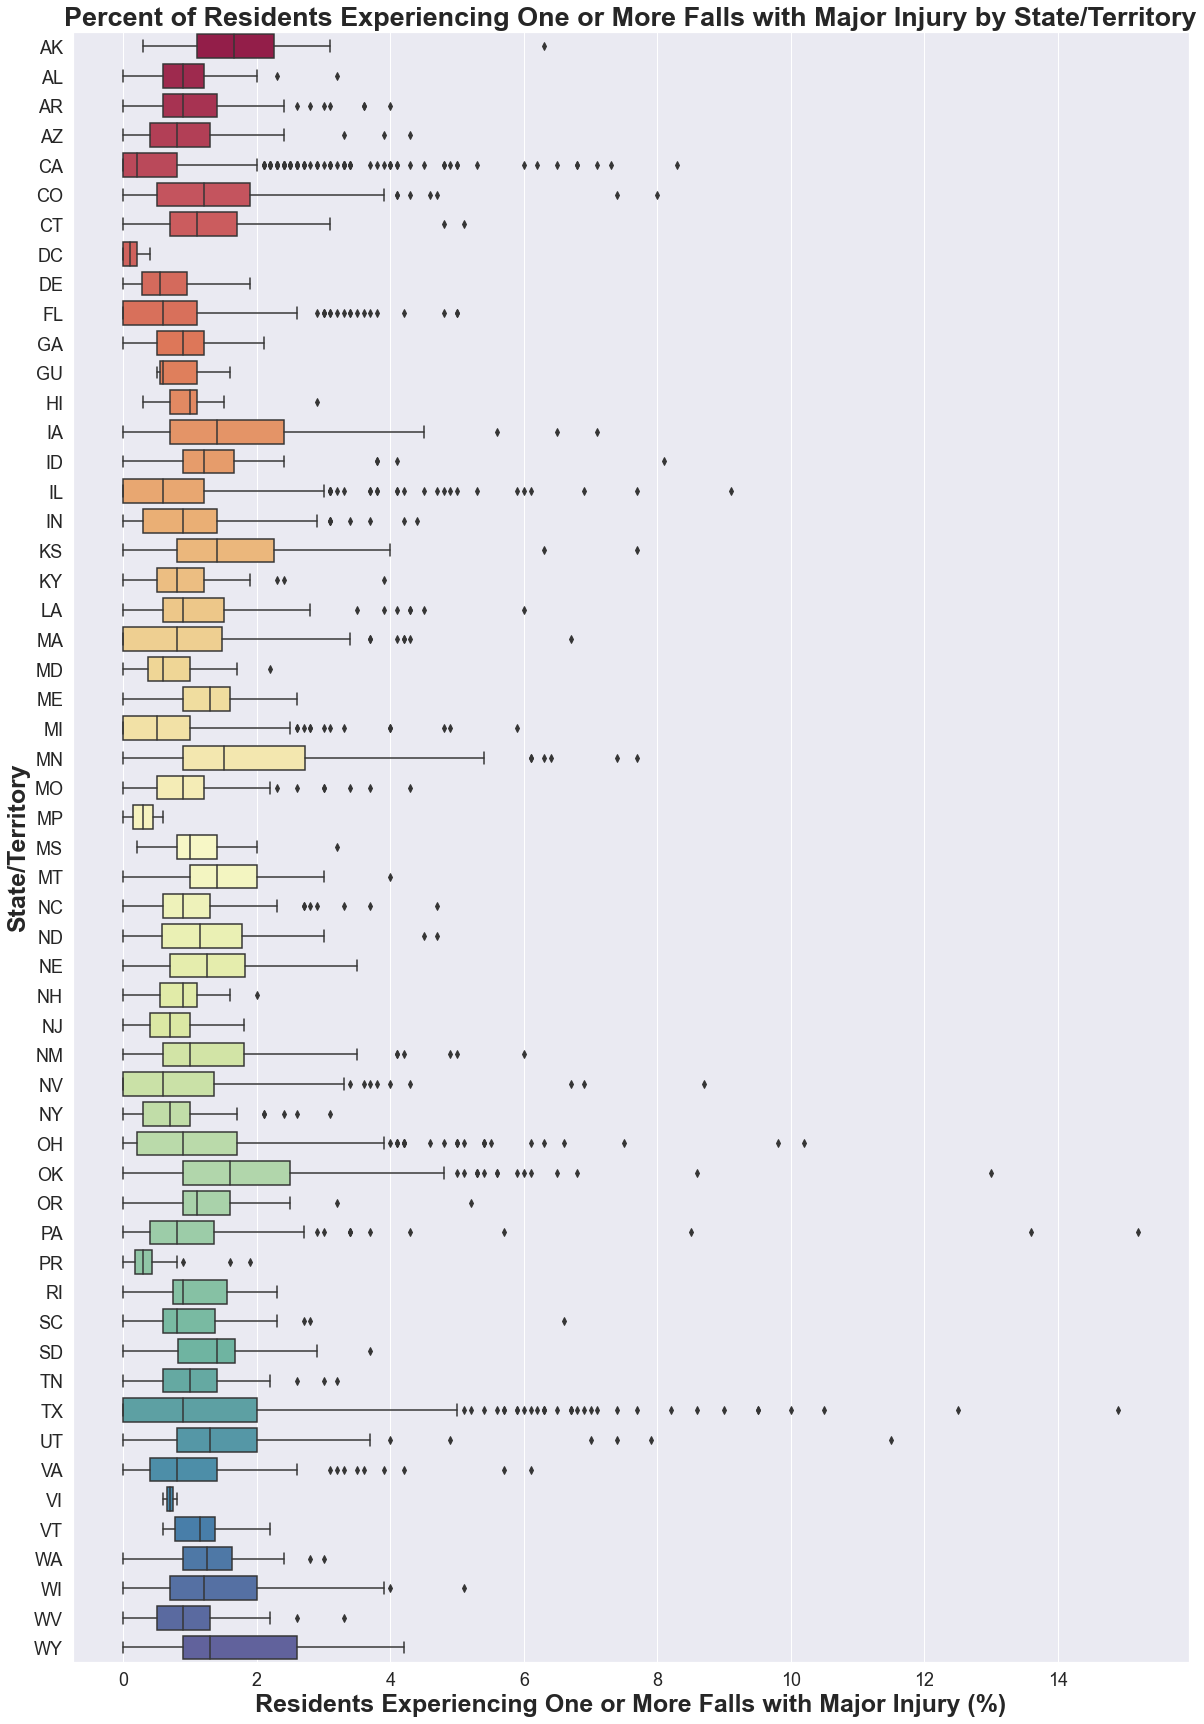

In [159]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=falls_maj_inj_state_clean_df, x='Percent of Residents Experiencing One or More Falls with Major Injury', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Residents Experiencing One or More Falls with Major Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Percent of Residents Experiencing One or More Falls with Major Injury by State/Territory', size = 27, fontweight = 'bold')


In [160]:
# Create the falls_maj_inj_too_df DataFrame.
falls_maj_inj_too_df = df[['Type of Ownership',
                    'Percent of Residents Experiencing One or More Falls with Major Injury']].copy()
falls_maj_inj_too_df.head().style.set_properties(**{'text-align': 'right'})


In [161]:
falls_maj_inj_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [162]:
falls_maj_inj_too_clean_df = falls_maj_inj_too_df.dropna()
falls_maj_inj_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [163]:
falls_maj_inj_too_clean_df.shape


(8407, 2)

In [164]:
falls_maj_inj_too_clean_df = falls_maj_inj_too_clean_df.loc[(falls_maj_inj_too_clean_df['Type of Ownership'] != '-')]
falls_maj_inj_too_clean_df.shape


(8386, 2)

In [165]:
# Create a falls_maj_inj_too_clean_df summary using .groupby
falls_maj_inj_too_clean_df.groupby(['Type of Ownership']).agg({'Percent of Residents Experiencing One or More Falls with Major Injury':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Percent of Residents Experiencing One or More Falls with Major Injury by Type of Ownership')

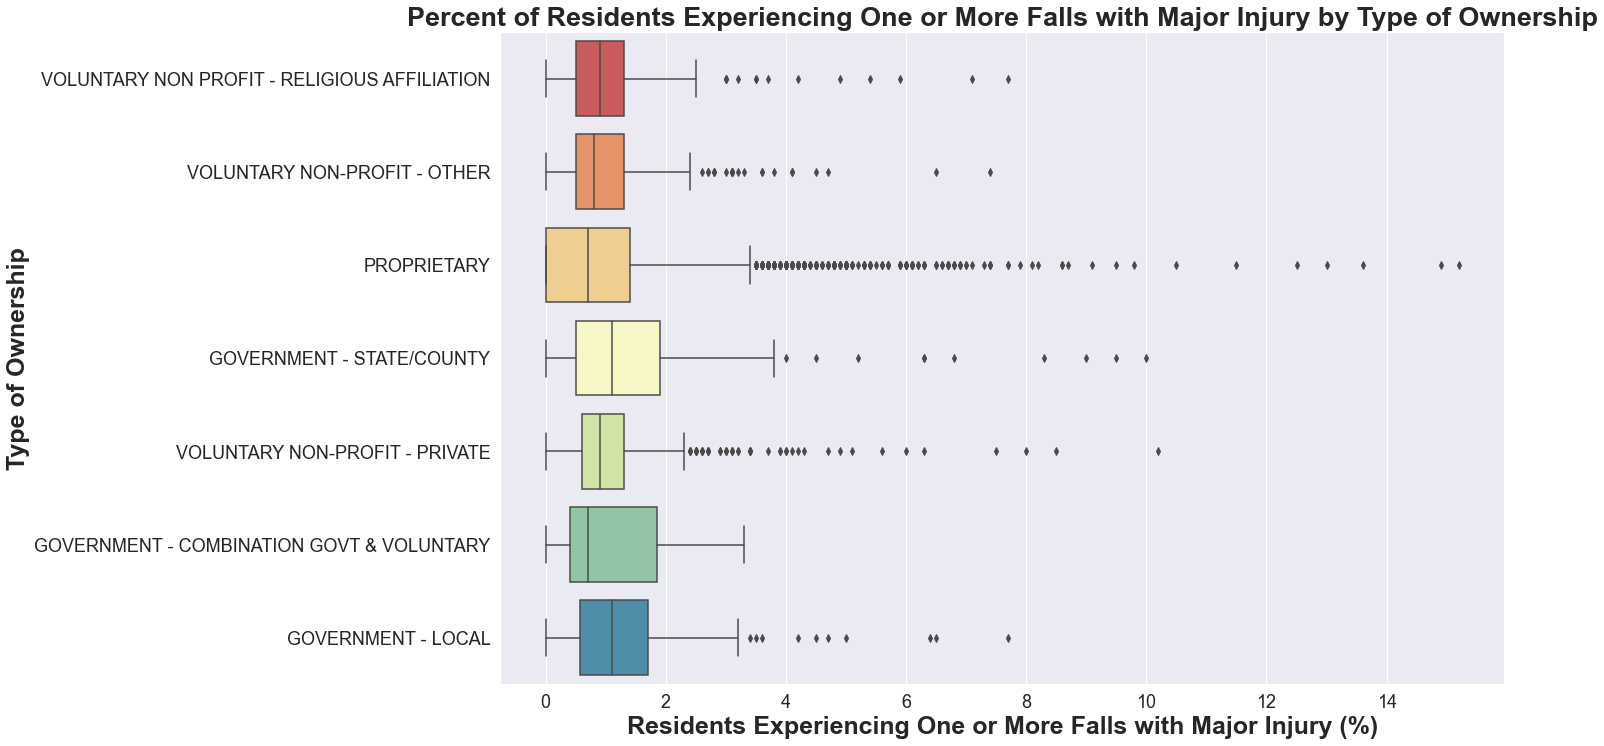

In [166]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=falls_maj_inj_too_clean_df, x='Percent of Residents Experiencing One or More Falls with Major Injury', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Residents Experiencing One or More Falls with Major Injury (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Percent of Residents Experiencing One or More Falls with Major Injury by Type of Ownership', size = 27, fontweight = 'bold')


### Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function


In [167]:
# Create the cp_func_nat_df DataFrame.
cp_func_nat_df = df[['Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function']].copy()
cp_func_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [168]:
cp_func_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [169]:
cp_func_nat_clean_df = cp_func_nat_df.dropna()
cp_func_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Functional Assessment and a Care Plan that Addresses Function')

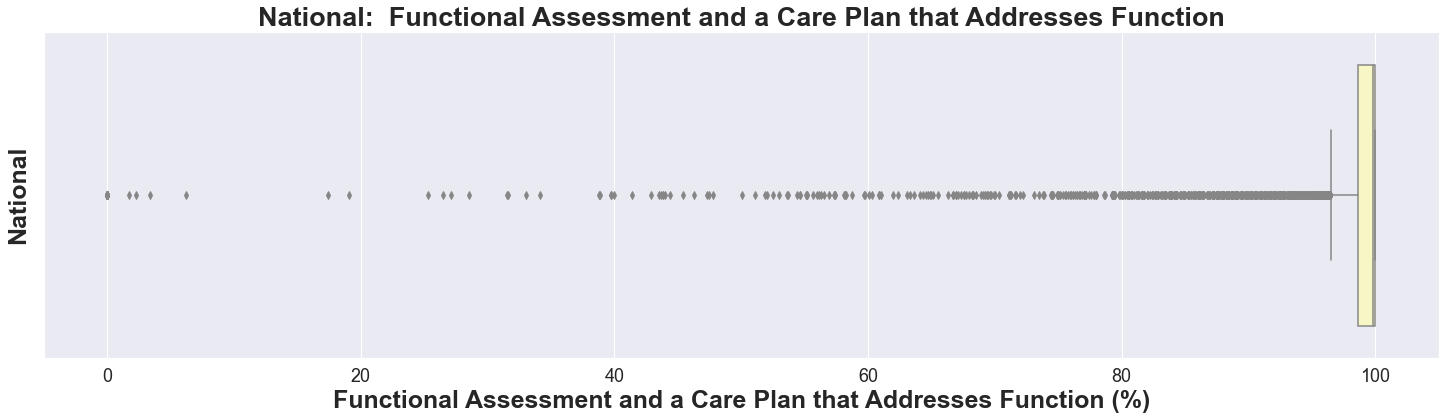

In [170]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=cp_func_nat_clean_df, x='Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Functional Assessment and a Care Plan that Addresses Function (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Functional Assessment and a Care Plan that Addresses Function', size = 27, fontweight = 'bold')


In [171]:
# Create the cp_func_state_df DataFrame.
cp_func_state_df = df[['State',
                    'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function']].copy()
cp_func_state_df.head().style.set_properties(**{'text-align': 'right'})

In [172]:
cp_func_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [173]:
cp_func_state_clean_df = cp_func_state_df.dropna()
cp_func_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [174]:
# Create a cp_func_state_clean_df summary using .groupby
cp_func_state_clean_df.groupby(['State']).agg({'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Functional Assessment and a Care Plan that Addresses Function by State/Territory')

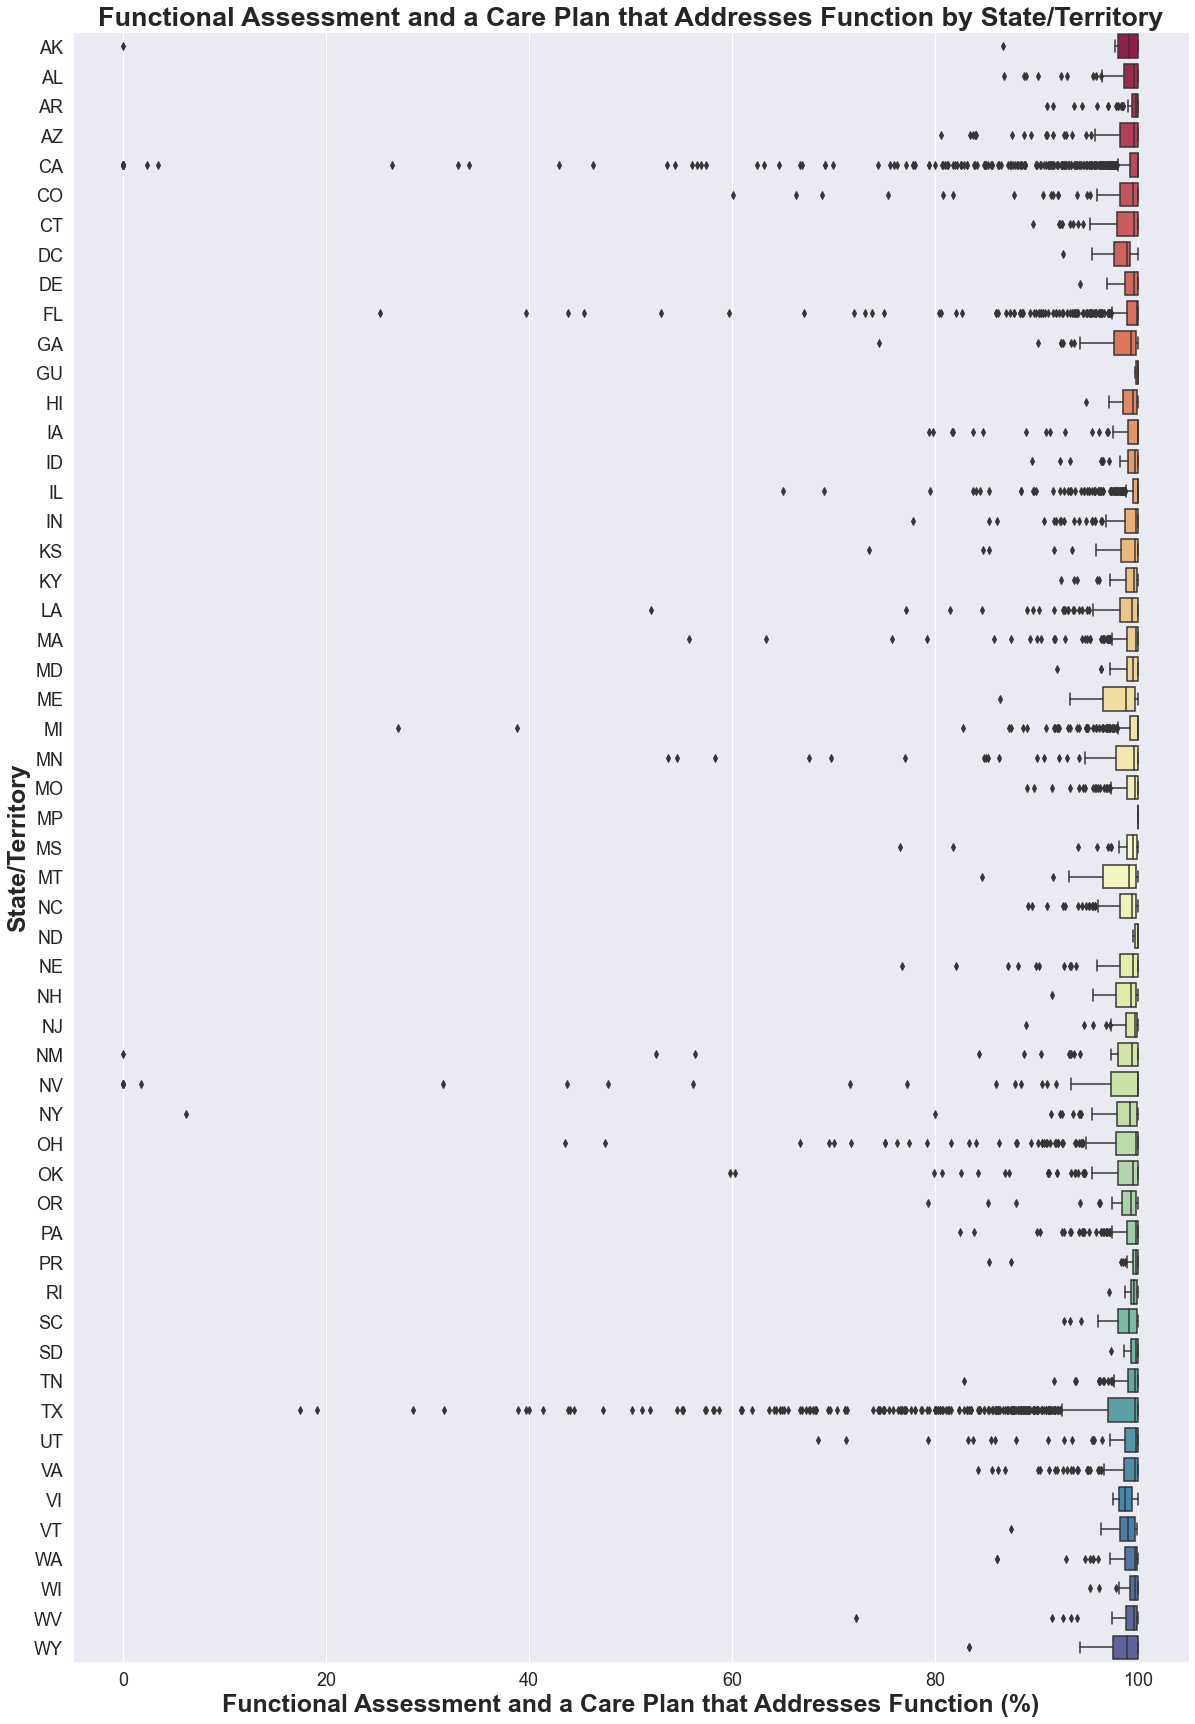

In [175]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=cp_func_state_clean_df, x='Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Functional Assessment and a Care Plan that Addresses Function (%)', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('Functional Assessment and a Care Plan that Addresses Function by State/Territory', size = 27, fontweight = 'bold')


In [176]:
# Create the cp_func_too_df DataFrame.
cp_func_too_df = df[['Type of Ownership',
                    'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function']].copy()
cp_func_too_df.head().style.set_properties(**{'text-align': 'right'})


In [177]:
cp_func_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [178]:
cp_func_too_clean_df = cp_func_too_df.dropna()
cp_func_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [179]:
cp_func_too_clean_df.shape


(8423, 2)

In [180]:
cp_func_too_clean_df = cp_func_too_clean_df.loc[(cp_func_too_clean_df['Type of Ownership'] != '-')]
cp_func_too_clean_df.shape


(8402, 2)

In [181]:
# Create a cp_func_too_clean_df summary using .groupby
cp_func_too_clean_df.groupby(['Type of Ownership']).agg({'Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'Functional Assessment and a Care Plan that Addresses Function by Type of Ownership')

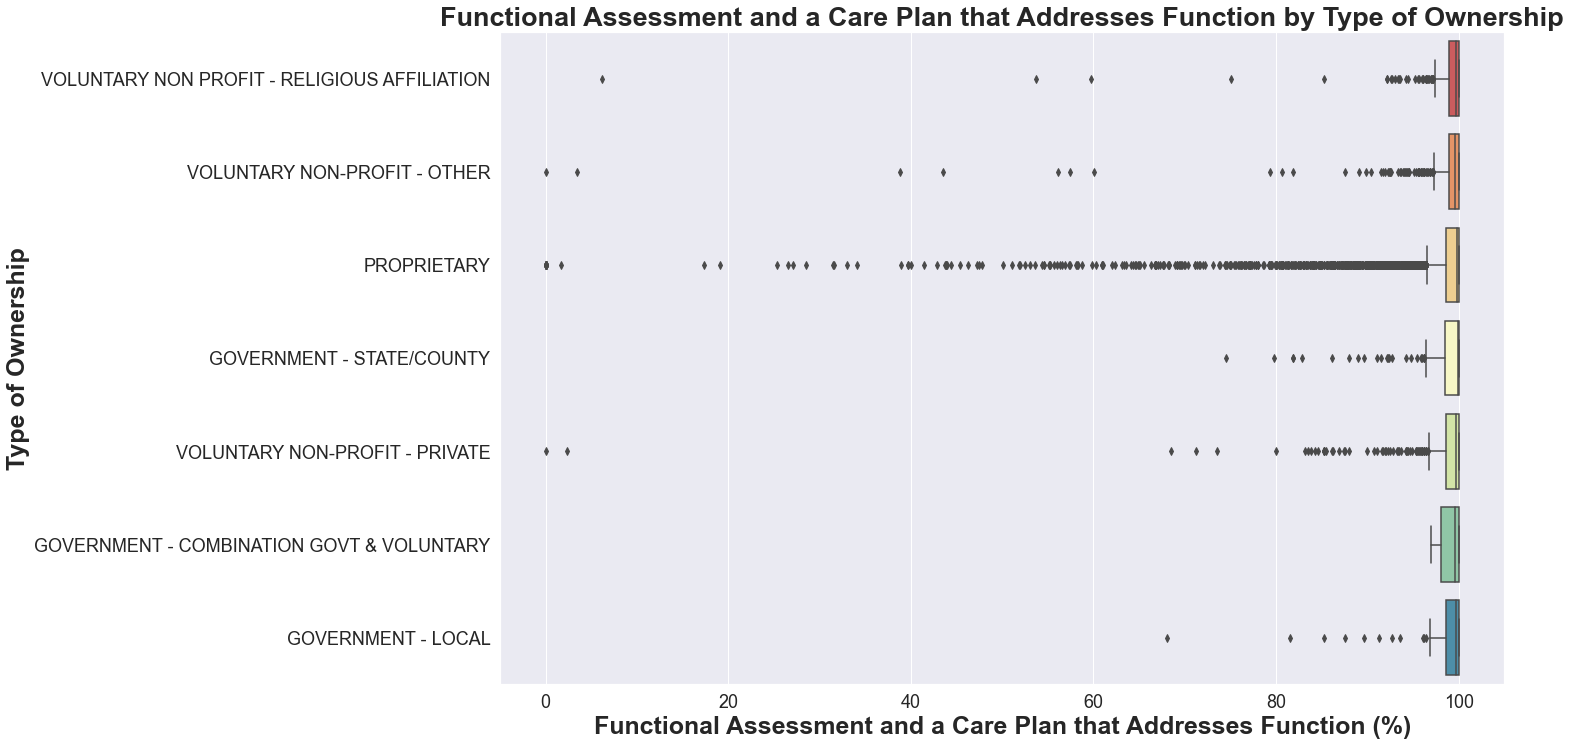

In [182]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=cp_func_too_clean_df, x='Application of Percent of Long Term Care Hospital Patients with an Admission and Discharge Functional Assessment and a Care Plan that Addresses Function', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Functional Assessment and a Care Plan that Addresses Function (%)', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('Functional Assessment and a Care Plan that Addresses Function by Type of Ownership', size = 27, fontweight = 'bold')


### Discharge to Community (DTC) Risk-Standardized Rate


In [183]:
# Create the dtc_nat_df DataFrame.
dtc_nat_df = df[['DTC Risk-Standardized Rate']].copy()
dtc_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [203]:
dtc_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [204]:
dtc_nat_clean_df = dtc_nat_df.dropna()
dtc_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  Discharge to Community (DTC) Standardized Rate')

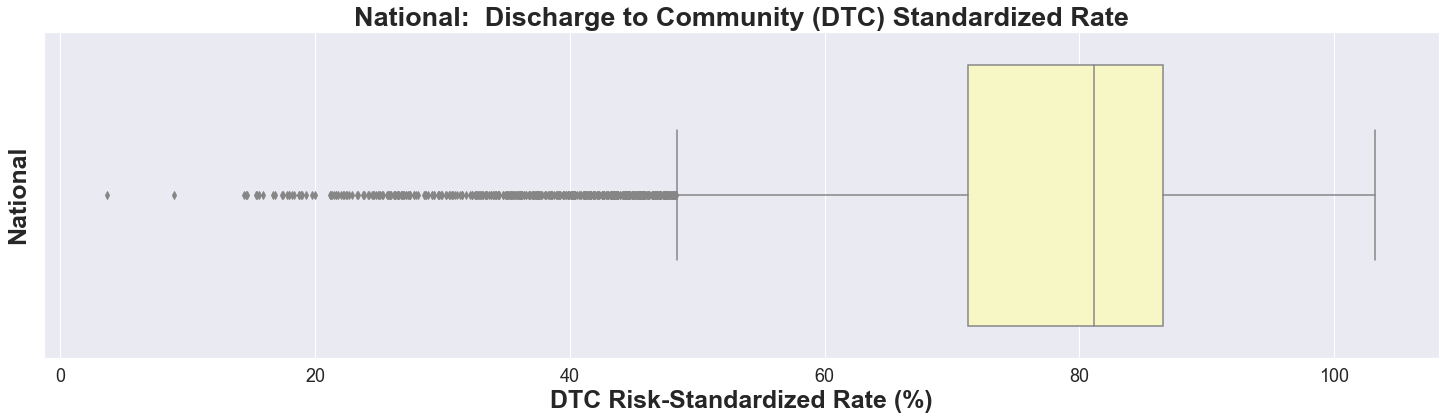

In [205]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=dtc_nat_clean_df, x='DTC Risk-Standardized Rate', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('DTC Risk-Standardized Rate (%)', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  Discharge to Community (DTC) Standardized Rate', size = 27, fontweight = 'bold')


### Potentially Preventable 30-Day Post Discharge Readmission (PPR) Risk-Standardized Rate


### Medicare Spending


In [184]:
# Create the medicare_spend_nat_df DataFrame.
medicare_spend_nat_df = df[['How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_nat_df.head().style.set_properties(**{'text-align': 'right'})


In [185]:
medicare_spend_nat_df.describe().style.set_properties(**{'text-align': 'right'})


In [186]:
medicare_spend_nat_clean_df = medicare_spend_nat_df.dropna()
medicare_spend_nat_clean_df.describe().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'National:  How Much Medicare Spends on an Episode of Care')

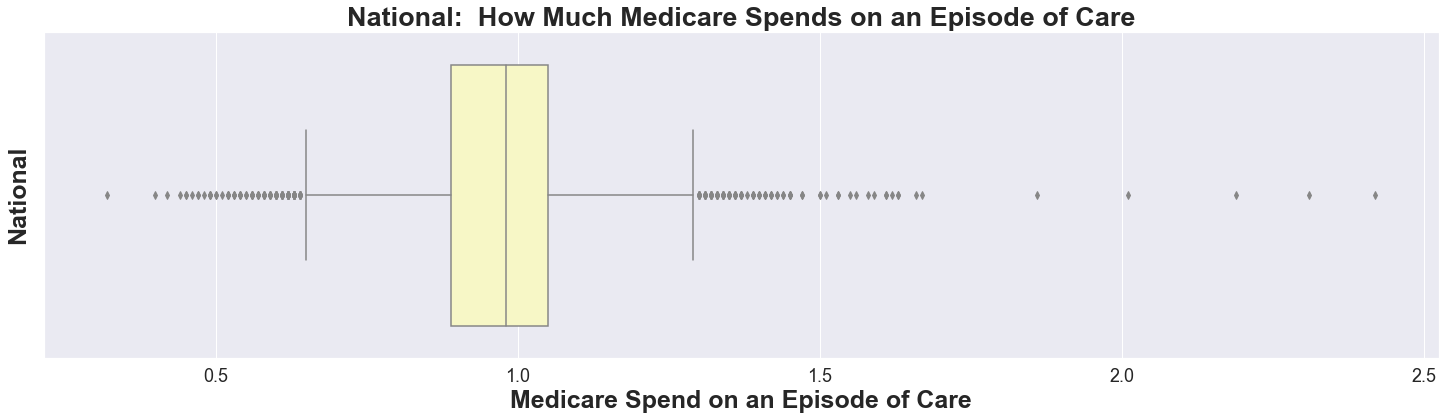

In [187]:
plt.figure(figsize = (25, 6))
sns.boxplot(data=medicare_spend_nat_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('National', size = 25, fontweight = 'bold')
plt.title('National:  How Much Medicare Spends on an Episode of Care', size = 27, fontweight = 'bold')


In [188]:
# Create the medicare_spend_state_df DataFrame.
medicare_spend_state_df = df[['State',
                    'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_state_df.head().style.set_properties(**{'text-align': 'right'})


In [189]:
medicare_spend_state_df.describe().style.set_properties(**{'text-align': 'right'})


In [190]:
medicare_spend_state_clean_df = medicare_spend_state_df.dropna()
medicare_spend_state_clean_df.describe().style.set_properties(**{'text-align': 'right'})

In [191]:
# Create a medicare_spend_state_clean_df summary using .groupby
medicare_spend_state_clean_df.groupby(['State']).agg({'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'How Much Medicare Spends on an Episode of Care by State/Territory')

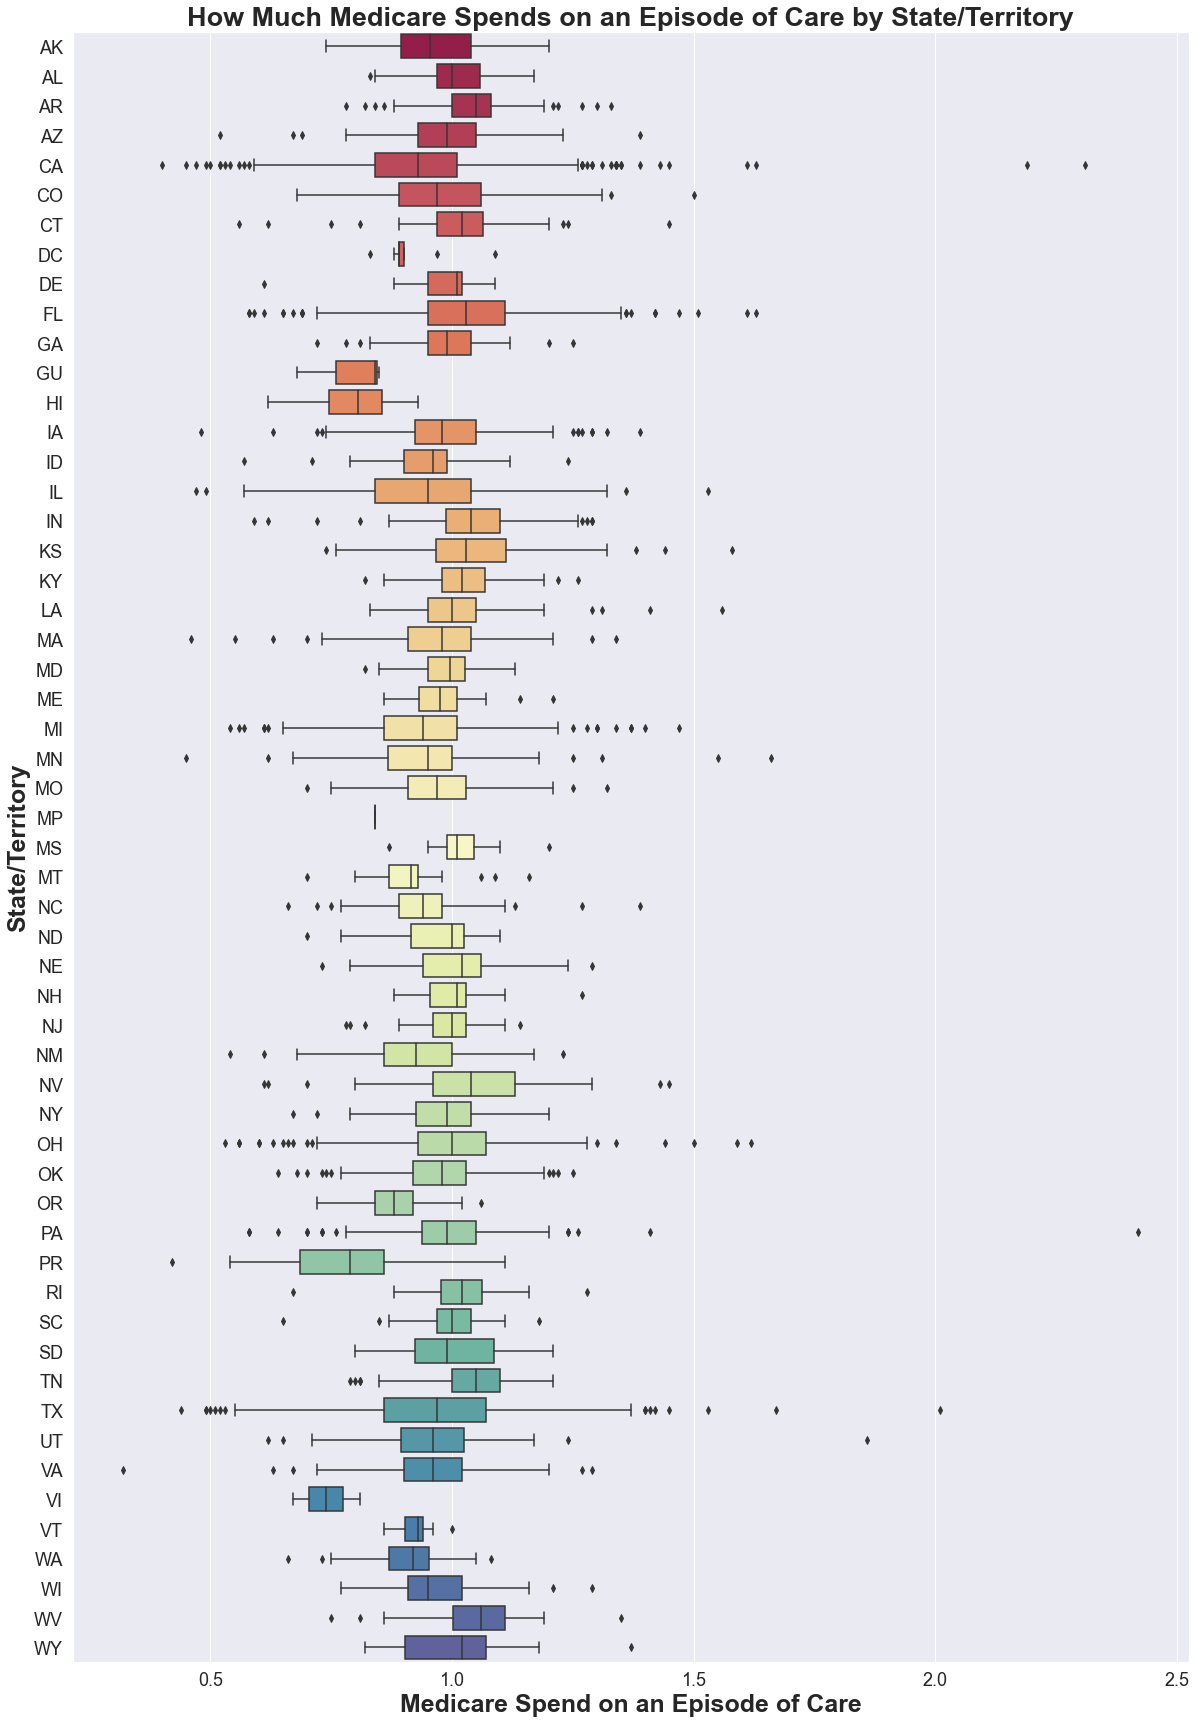

In [192]:
plt.figure(figsize = (20, 30))
sns.boxplot(data=medicare_spend_state_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            y='State', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('State/Territory', size = 25, fontweight = 'bold')
plt.title('How Much Medicare Spends on an Episode of Care by State/Territory', size = 27, fontweight = 'bold')


In [193]:
# Create the medicare_spend_too_df DataFrame.
medicare_spend_too_df = df[['Type of Ownership',
                    'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally']].copy()
medicare_spend_too_df.head().style.set_properties(**{'text-align': 'right'})


In [194]:
medicare_spend_too_df.describe().style.set_properties(**{'text-align': 'right'})


In [195]:
medicare_spend_too_clean_df = medicare_spend_too_df.dropna()
medicare_spend_too_clean_df.describe().style.set_properties(**{'text-align': 'right'})


In [196]:
# Create a medicare_spend_too_clean_df summary using .groupby
medicare_spend_too_clean_df.groupby(['Type of Ownership']).agg({'How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally':['count', 'mean', 'median', 'min', 'max']}).reset_index().style.set_properties(**{'text-align': 'right'})


Text(0.5, 1.0, 'How Much Medicare Spends on an Episode of Care by Type of Ownership')

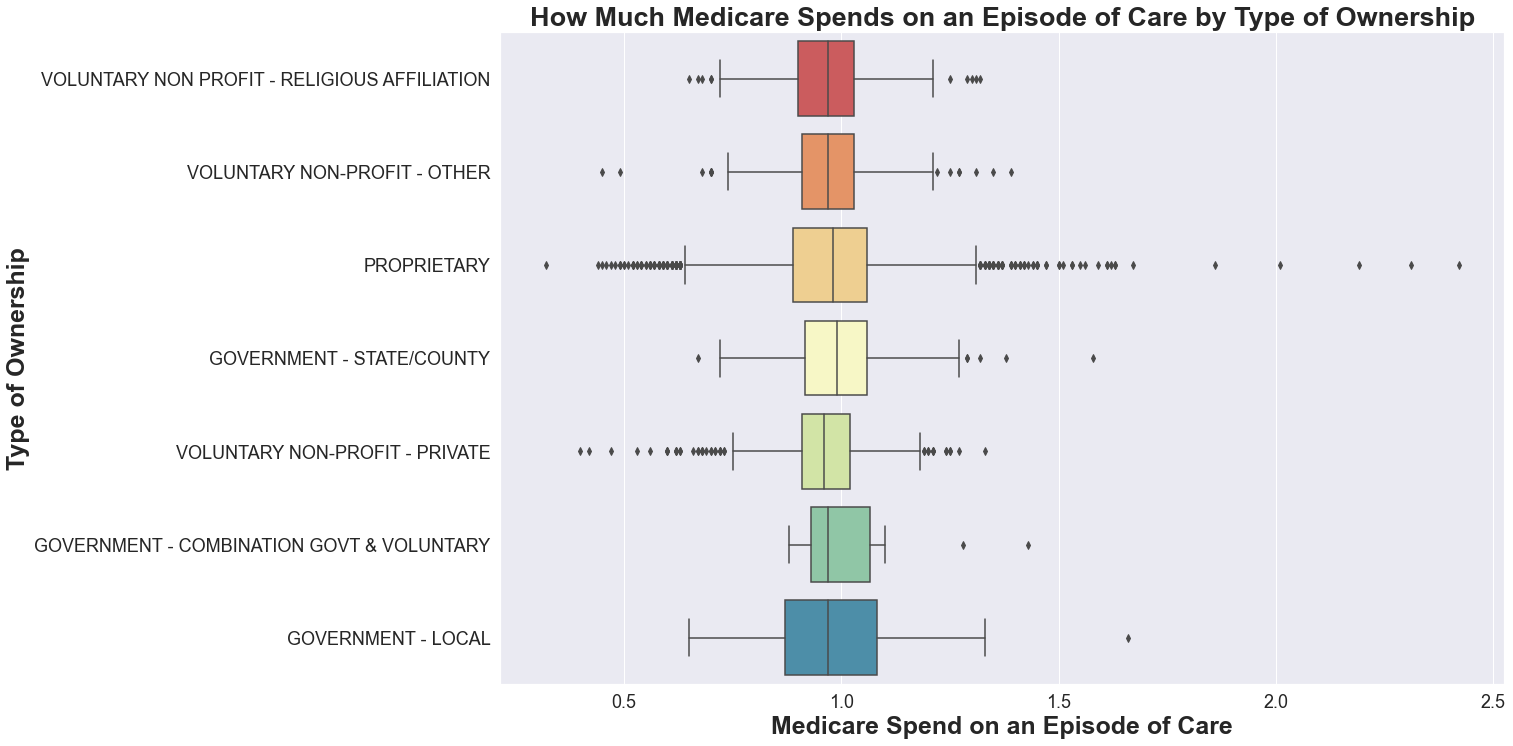

In [197]:
plt.figure(figsize = (18, 12))
sns.boxplot(data=medicare_spend_too_clean_df, x='How much Medicare spends on an episode of care at this agency, compared to Medicare spending across all agencies nationally', 
            y='Type of Ownership', palette = 'Spectral')
plt.xticks(rotation = 0, size = 18)
plt.yticks(size = 18)
plt.xlabel('Medicare Spend on an Episode of Care', size = 25, fontweight = 'bold')
plt.ylabel('Type of Ownership', size = 25, fontweight = 'bold')
plt.title('How Much Medicare Spends on an Episode of Care by Type of Ownership', size = 27, fontweight = 'bold')


## Patient Survey Star Rating Analysis


In [198]:
df = pd.read_csv('Resources/HHCAHPS_Provider_Jan2023.csv')


In [199]:
# Set the below parameters so that all rows and columns would be visible
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [200]:
# Calculate the number of rows and columns in the dataset
df.shape


(11610, 26)

In [201]:
df.head().style.set_properties(**{'text-align': 'right'})


In [202]:
df.tail().style.set_properties(**{'text-align': 'right'})
